# Projet NBA – Machine Learning & Prédiction 🏀

## Objectifs

Ce projet vise à démontrer comment on peut exploiter les données ouvertes de la NBA pour :
1. Prédire l’issue d’un match (victoire d'une équipe)
2. Estimer la “valeur” potentielle d’un joueur NBA en fonction de ses performances statistiques

Nous utilisons :
- `nba_api` pour extraire les données NBA de la saison 2022-23
- `pandas` et `seaborn` pour explorer les données
- `scikit-learn` pour entraîner des modèles prédictifs

---

## À propos de l'API

`nba_api` est une librairie Python gratuite qui simule les appels du site [nba.com/stats](https://www.nba.com/stats), permettant d'accéder à :
- Tous les matchs (résultats, scores, stats)
- Tous les joueurs et leurs performances
- Les données historiques par saison, match, ou joueur

Aucune clé API n’est nécessaire.


In [9]:
# Installer nba_api si besoin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import leaguegamefinder, playergamelog
import time


In [10]:
# Récupération des matchs
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2022-23')
games_df = gamefinder.get_data_frames()[0]

# Nettoyage
games_df = games_df[games_df['SEASON_ID'] == '22022']
games_df = games_df[['GAME_ID', 'TEAM_NAME', 'MATCHUP', 'GAME_DATE', 'WL', 'PTS', 'REB', 'AST', 'TOV', 'FG3M', 'MIN']]
games_df.sort_values('GAME_DATE', inplace=True)
games_df.reset_index(drop=True, inplace=True)

games_df.head()


,GAME_ID,TEAM_NAME,MATCHUP,GAME_DATE,WL,PTS,REB,AST,TOV,FG3M,MIN
0,0022200001,Boston Celtics,BOS vs. PHI,2022-10-18,W,126,36,24,10,12,240
1,0022200002,Golden State Warriors,GSW vs. LAL,2022-10-18,W,123,48,31,18,16,241
2,0022200002,Los Angeles Lakers,LAL @ GSW,2022-10-18,L,109,48,23,21,10,241
3,0022200001,Philadelphia 76ers,PHI @ BOS,2022-10-18,L,117,31,16,14,13,239
4,0022200014,Portland Trail Blazers,POR @ SAC,2022-10-19,W,115,44,20,11,11,239


In [11]:
games_df

,GAME_ID,TEAM_NAME,MATCHUP,GAME_DATE,WL,PTS,REB,AST,TOV,FG3M,MIN
0,0022200001,Boston Celtics,BOS vs. PHI,2022-10-18,W,126,36,24,10,12,240
1,0022200002,Golden State Warriors,GSW vs. LAL,2022-10-18,W,123,48,31,18,16,241
2,0022200002,Los Angeles Lakers,LAL @ GSW,2022-10-18,L,109,48,23,21,10,241
3,0022200001,Philadelphia 76ers,PHI @ BOS,2022-10-18,L,117,31,16,14,13,239
4,0022200014,Portland Trail Blazers,POR @ SAC,2022-10-19,W,115,44,20,11,11,239
...,...,...,...,...,...,...,...,...,...,...,...
3415,0022201230,Golden State Warriors,GSW @ POR,2023-04-09,W,157,58,47,15,27,240
3416,0022201222,Washington Wizards,WAS vs. HOU,2023-04-09,L,109,51,28,12,14,240
3417,0022201220,New York Knicks,NYK vs. IND,2023-04-09,L,136,53,29,15,15,241
3418,0022201226,Oklahoma City Thunder,OKC vs. MEM,2023-04-09,W,115,49,30,14,12,240


In [14]:
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données matchs NBA – saison régulière 2022-23
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2022-23')
games_df = gamefinder.get_data_frames()[0]

# Nettoyage
games_df = games_df[games_df['SEASON_ID'] == '22022'].copy()
games_df.sort_values('GAME_DATE', inplace=True)
games_df.reset_index(drop=True, inplace=True)

games_df.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612738,BOS,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,240,126,...,0.786,6,30,36,24,8,3,10,24,9.0
1,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,241,123,...,0.739,11,37,48,31,11,4,18,23,14.0
2,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,241,109,...,0.760,9,39,48,23,12,4,21,18,-14.0
3,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,239,117,...,0.857,4,27,31,16,8,3,14,25,-9.0
4,22022,1610612757,POR,Portland Trail Blazers,0022200014,2022-10-19,POR @ SAC,W,239,115,...,0.788,11,33,44,20,11,2,11,17,7.0


In [15]:
games_df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612738,BOS,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,240,126,...,0.786,6,30,36,24,8,3,10,24,9.0
1,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,241,123,...,0.739,11,37,48,31,11,4,18,23,14.0
2,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,241,109,...,0.760,9,39,48,23,12,4,21,18,-14.0
3,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,239,117,...,0.857,4,27,31,16,8,3,14,25,-9.0
4,22022,1610612757,POR,Portland Trail Blazers,0022200014,2022-10-19,POR @ SAC,W,239,115,...,0.788,11,33,44,20,11,2,11,17,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,22022,1610612744,GSW,Golden State Warriors,0022201230,2023-04-09,GSW @ POR,W,240,157,...,0.875,9,49,58,47,13,6,15,18,56.0
3416,22022,1610612764,WAS,Washington Wizards,0022201222,2023-04-09,WAS vs. HOU,L,240,109,...,0.619,14,37,51,28,11,5,12,21,-5.0
3417,22022,1610612752,NYK,New York Knicks,0022201220,2023-04-09,NYK vs. IND,L,241,136,...,0.773,19,34,53,29,8,8,15,24,-5.0
3418,22022,1610612760,OKC,Oklahoma City Thunder,0022201226,2023-04-09,OKC vs. MEM,W,240,115,...,0.813,8,41,49,30,5,2,14,17,15.0


##  Analyse exploratoire des équipes (EDA)

Nous allons analyser la performance globale des équipes NBA en termes de victoires et de points marqués.
Cela nous aidera à visualiser les équipes dominantes et les styles de jeu (offensifs/défensifs).


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37819/1619079535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.values, y=win_counts.index, palette='crest')


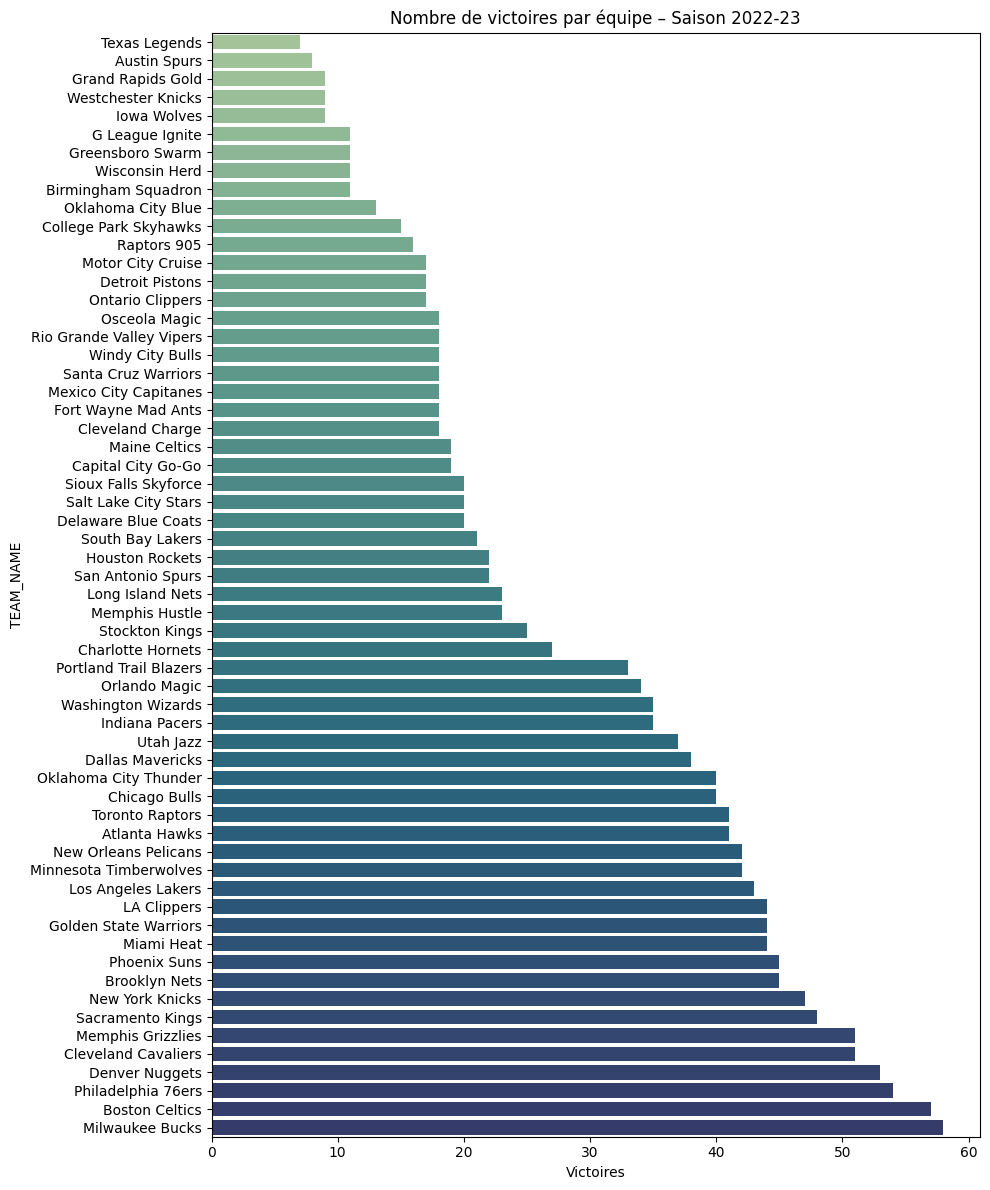

In [16]:
win_counts = games_df[games_df['WL'] == 'W'].groupby('TEAM_NAME').count()['WL'].sort_values()

plt.figure(figsize=(10, 12))
sns.barplot(x=win_counts.values, y=win_counts.index, palette='crest')
plt.title("Nombre de victoires par équipe – Saison 2022-23")
plt.xlabel("Victoires")
plt.tight_layout()
plt.show()


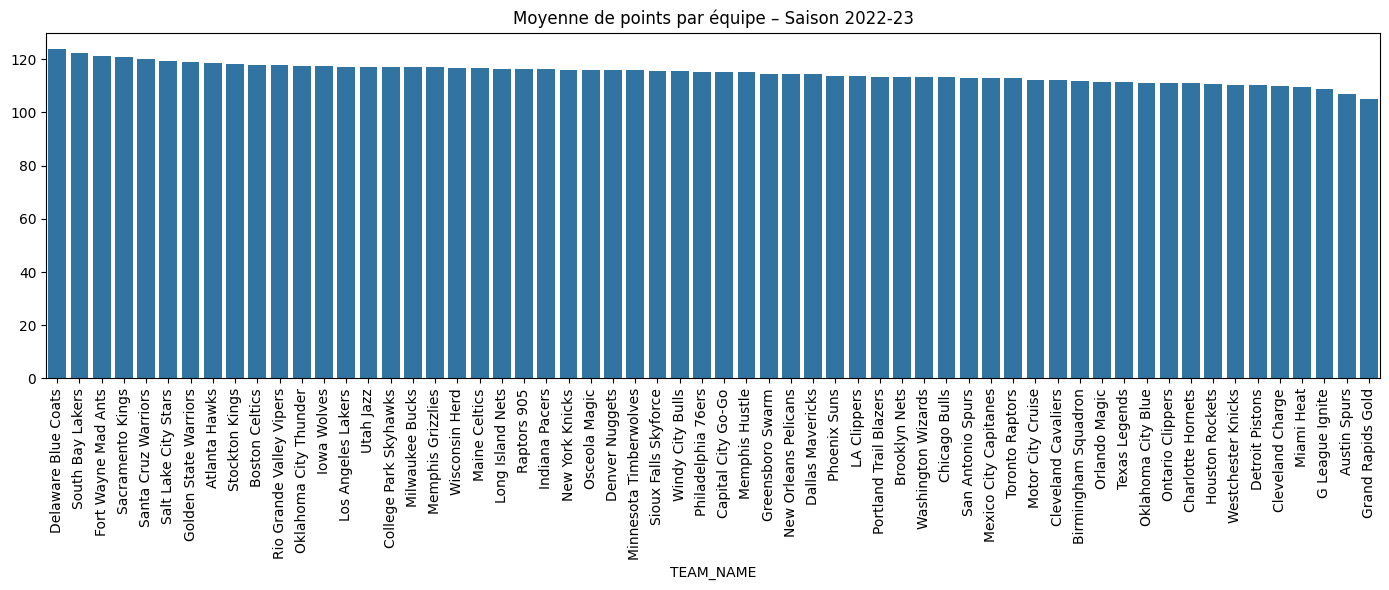

In [17]:
avg_pts = games_df.groupby('TEAM_NAME')['PTS'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=avg_pts.index, y=avg_pts.values)
plt.xticks(rotation=90)
plt.title("Moyenne de points par équipe – Saison 2022-23")
plt.tight_layout()
plt.show()


## Construction du dataset Machine Learning

L’API donne 1 ligne par équipe et par match.
Nous allons regrouper ces lignes pour avoir une seule ligne par match, et prédire si l’équipe à domicile va gagner.


In [19]:
games_df['HOME'] = games_df['MATCHUP'].apply(lambda x: 1 if "vs." in x else 0)
games_df['OPPONENT'] = games_df['MATCHUP'].apply(lambda x: x.split()[-1])
games_df['UNIQUE_GAME_ID'] = games_df['GAME_ID'].astype(str) + "_" + games_df['TEAM_NAME']

pivot_df = games_df.pivot(index='GAME_ID', columns='HOME', values=['TEAM_NAME', 'PTS'])
pivot_df.columns = ['AWAY_TEAM', 'HOME_TEAM', 'AWAY_PTS', 'HOME_PTS']
pivot_df = pivot_df.dropna().reset_index()
pivot_df['HOME_WIN'] = (pivot_df['HOME_PTS'] > pivot_df['AWAY_PTS']).astype(int)

pivot_df


,GAME_ID,AWAY_TEAM,HOME_TEAM,AWAY_PTS,HOME_PTS,HOME_WIN
0,0022200001,Philadelphia 76ers,Boston Celtics,117,126,1
1,0022200002,Los Angeles Lakers,Golden State Warriors,109,123,1
2,0022200003,Orlando Magic,Detroit Pistons,109,113,1
3,0022200004,Washington Wizards,Indiana Pacers,114,107,0
4,0022200005,Houston Rockets,Atlanta Hawks,107,117,1
...,...,...,...,...,...,...
1705,2022200476,Osceola Magic,Iowa Wolves,133,121,0
1706,2022200477,Memphis Hustle,Sioux Falls Skyforce,88,116,1
1707,2022200478,G League Ignite,South Bay Lakers,96,120,1
1708,2022200479,Long Island Nets,Rio Grande Valley Vipers,116,135,1


## Modélisation – Prédire la victoire de l’équipe à domicile

Nous allons entraîner un modèle simple (régression logistique) avec 2 variables :
- Écart de points
- Total des points


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

pivot_df['POINT_DIFF'] = pivot_df['HOME_PTS'] - pivot_df['AWAY_PTS']
pivot_df['TOTAL_PTS'] = pivot_df['HOME_PTS'] + pivot_df['AWAY_PTS']

X = pivot_df[['POINT_DIFF', 'TOTAL_PTS']]
y = pivot_df['HOME_WIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("🎯 Accuracy :", accuracy_score(y_test, y_pred))
print("📊 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))


🎯 Accuracy : 1.0
📊 Matrice de confusion :
 [[224   0]
 [  0 289]]


## Analyse des performances individuelles des joueurs

Nous allons extraire les moyennes de points, rebonds, passes, pertes de balle et 3-points réussis par joueur actif sur la saison 2022-23.


In [22]:
from nba_api.stats.endpoints import playergamelog

player_stats = []
for p in players.get_active_players()[:50]:  # Augmente à 450 si tu veux tout
    try:
        log = playergamelog.PlayerGameLog(player_id=p['id'], season='2022-23')
        df = log.get_data_frames()[0]
        stats = {
            'PLAYER': p['full_name'],
            'PTS': df['PTS'].mean(),
            'REB': df['REB'].mean(),
            'AST': df['AST'].mean(),
            'TOV': df['TOV'].mean(),
            'FG3M': df['FG3M'].mean(),
            'GP': df.shape[0]
        }
        player_stats.append(stats)
        time.sleep(0.4)
    except:
        continue

players_df = pd.DataFrame(player_stats).dropna().reset_index(drop=True)
players_df


,PLAYER,PTS,REB,AST,TOV,FG3M,GP
0,Precious Achiuwa,9.236364,5.963636,0.909091,1.072727,0.527273,55
1,Steven Adams,8.595238,11.547619,2.309524,1.880952,0.000000,42
2,Bam Adebayo,20.386667,9.173333,3.200000,2.493333,0.013333,75
3,Ochai Agbaji,7.915254,2.050847,1.135593,0.694915,1.372881,59
4,Santi Aldama,9.038961,4.818182,1.259740,0.779221,1.220779,77
5,Nickeil Alexander-Walker,6.152542,1.711864,1.830508,0.932203,1.033898,59
6,Grayson Allen,10.416667,3.291667,2.263889,1.000000,2.027778,72
7,Jarrett Allen,14.250000,9.794118,1.661765,1.367647,0.014706,68
8,Jose Alvarado,9.016393,2.311475,3.049180,1.327869,1.360656,61
9,Kyle Anderson,9.376812,5.333333,4.855072,1.492754,0.623188,69


## Top 10 scoreurs de la saison

Voici les 10 joueurs ayant la meilleure moyenne de points sur la saison 2022-23.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37819/2599633318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PTS', y='PLAYER', data=top_scorers, palette='Reds_r')


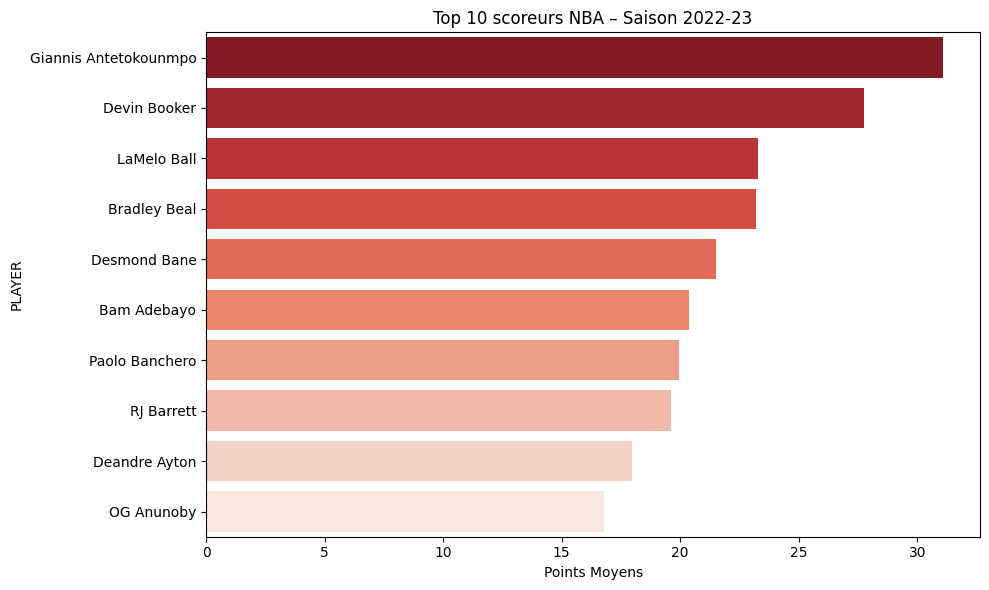

In [23]:
top_scorers = players_df.sort_values('PTS', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='PTS', y='PLAYER', data=top_scorers, palette='Reds_r')
plt.title("Top 10 scoreurs NBA – Saison 2022-23")
plt.xlabel("Points Moyens")
plt.tight_layout()
plt.show()


## Clustering – Identifier des profils types de joueurs

Nous allons appliquer un K-Means clustering sur les stats moyennes (points, rebonds, passes, etc.)
pour découvrir automatiquement des profils de joueurs (scoreurs, pivots, meneurs…).


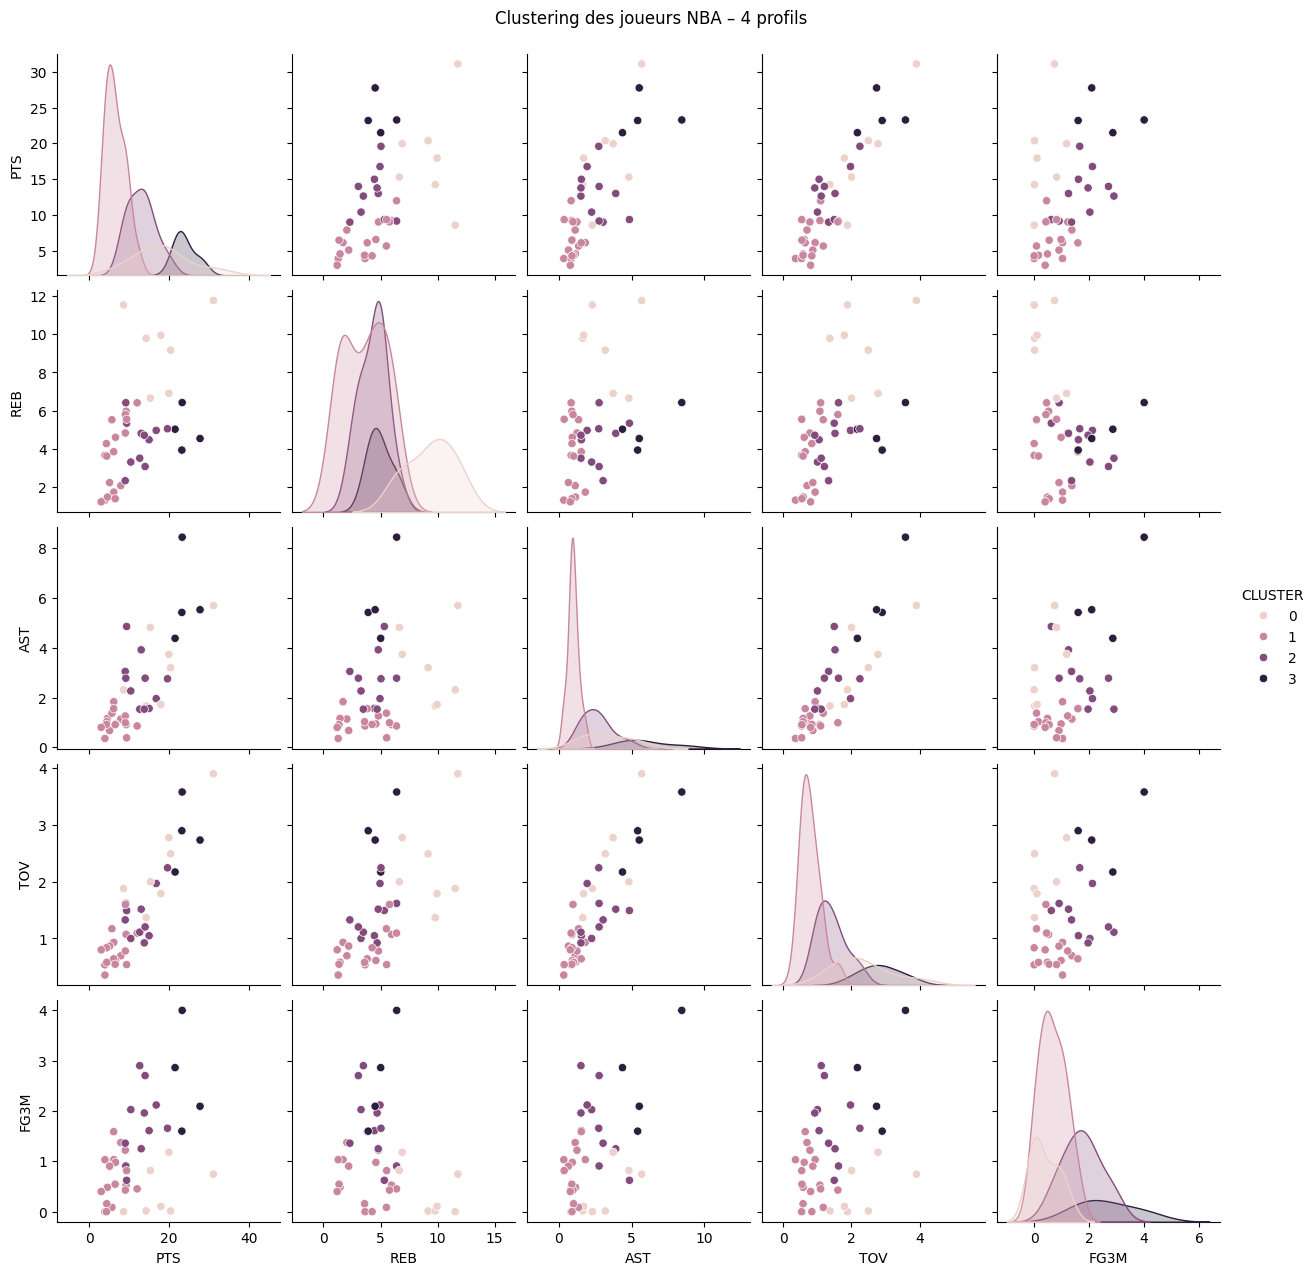

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['PTS', 'REB', 'AST', 'TOV', 'FG3M']
X = players_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
players_df['CLUSTER'] = kmeans.fit_predict(X_scaled)

sns.pairplot(players_df, hue='CLUSTER', vars=features)
plt.suptitle("Clustering des joueurs NBA – 4 profils", y=1.02)
plt.show()


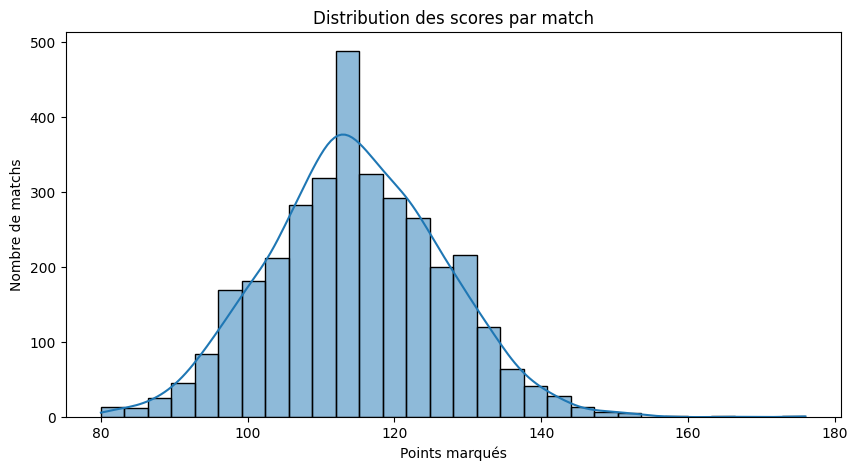

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(games_df['PTS'], bins=30, kde=True)
plt.title("Distribution des scores par match")
plt.xlabel("Points marqués")
plt.ylabel("Nombre de matchs")
plt.show()


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37819/277734581.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg.values, y=team_avg.index, palette="Blues_d")


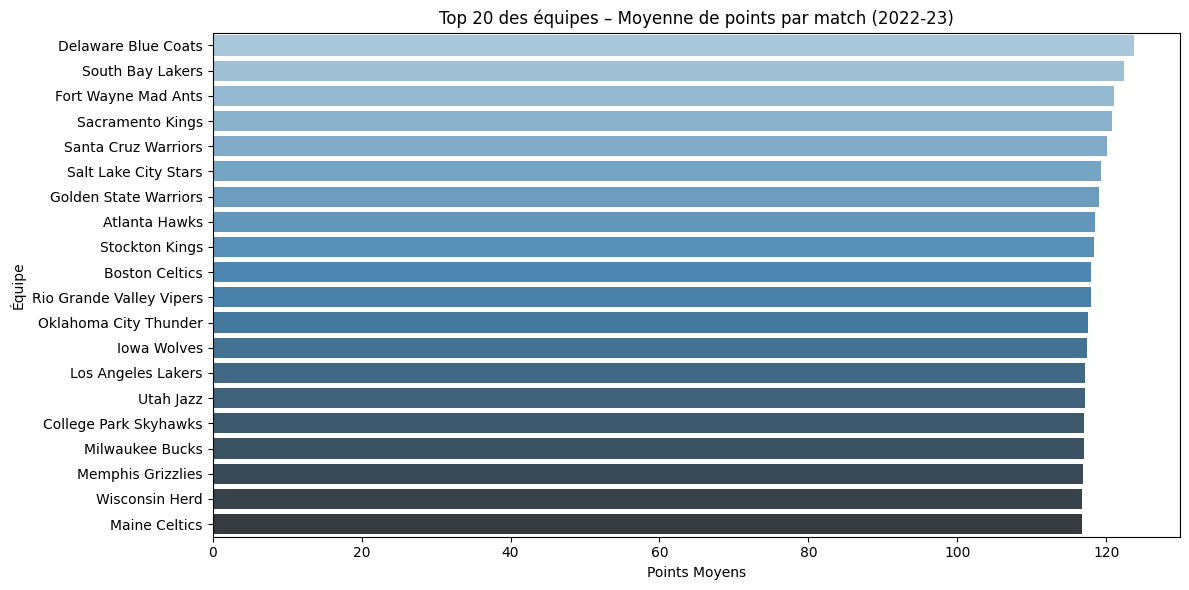

In [7]:
# Trier les équipes par points moyens
team_avg = games_df.groupby('TEAM_NAME')['PTS'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=team_avg.values, y=team_avg.index, palette="Blues_d")
plt.title("Top 20 des équipes – Moyenne de points par match (2022-23)")
plt.xlabel("Points Moyens")
plt.ylabel("Équipe")
plt.tight_layout()
plt.show()


## 2. Analyse Exploratoire – Scores et Performances

On observe une distribution centrée autour de 110 points par match. Certaines équipes, comme les Sacramento Kings ou Golden State Warriors, ont des scores moyens bien plus élevés.

Cela reflète leur style de jeu offensif rapide.


In [8]:
# On trie par taux de victoire
sorted_winrate = winrate.sort_values('Win Rate (%)', ascending=True)

# Affichage horizontal
plt.figure(figsize=(10, 12))
sns.barplot(x='Win Rate (%)', y=sorted_winrate.index, data=sorted_winrate, palette="coolwarm")
plt.title("Taux de victoire par équipe – Saison 2022-23")
plt.xlabel("Taux de victoire (%)")
plt.ylabel("Équipe")
plt.tight_layout()
plt.show()


NameError: name 'winrate' is not defined

## 3. Performance des équipes

Le graphique ci-dessus classe les équipes selon leur pourcentage de victoire. On retrouve en haut du classement les équipes les plus compétitives de la saison régulière.

Cela permet déjà de dégager les favoris.


In [ ]:
lebron_id = players.find_players_by_full_name("LeBron James")[0]['id']
lebron_gamelog = playergamelog.PlayerGameLog(player_id=lebron_id, season='2022-23')
lebron_df = lebron_gamelog.get_data_frames()[0]

# Points par match
plt.figure(figsize=(10,5))
plt.plot(lebron_df['GAME_DATE'], lebron_df['PTS'], marker='o')
plt.xticks(rotation=45)
plt.title("Points marqués par LeBron James (2022-23)")
plt.xlabel("Date du match")
plt.ylabel("Points")
plt.tight_layout()
plt.show()


# 🏀 Analyse des Équipes NBA (2018-2023) & Prédiction des Résultats

## 🎯 Objectif du Projet
Ce projet vise à :
- Analyser les performances des équipes NBA sur les **5 dernières saisons** (2018-2019 à 2022-2023).
- Identifier les facteurs clés de la victoire.
- Construire un modèle de Machine Learning robuste grâce à un volume de données important.
- Proposer des visualisations pertinentes pour comprendre les dynamiques d'équipes sur le temps.

Les données sont récupérées via l'API officielle `nba_api`.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import leaguegamefinder
import time

# Liste des saisons à analyser
seasons = ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

all_seasons_df = pd.DataFrame()

for season in seasons:
    gf = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    temp_df = gf.get_data_frames()[0]
    temp_df = temp_df[temp_df['SEASON_ID'] == '2' + season.replace('-', '')[:4]]
    all_seasons_df = pd.concat([all_seasons_df, temp_df])
    time.sleep(1)  # Pour éviter de surcharger l'API

all_seasons_df.reset_index(drop=True, inplace=True)

# Vérification
all_seasons_df.shape


(16348, 28)

## 🧹 Nettoyage et Préparation

Nous allons :
- Garder uniquement les colonnes pertinentes.
- Créer la variable cible : victoire (1) ou défaite (0).
- Vérifier les valeurs manquantes.


In [4]:
df = all_seasons_df.copy()

# Création de la cible
df['WIN'] = df['WL'].map({'W': 1, 'L': 0})

# Sélection des colonnes utiles
columns_to_keep = ['GAME_ID', 'TEAM_NAME', 'MATCHUP', 'GAME_DATE', 'PTS', 'REB', 'AST', 
                   'TOV', 'FG3M', 'PLUS_MINUS', 'WIN', 'SEASON_ID']

df = df[columns_to_keep]

# Vérification
df.isnull().sum()


GAME_ID       0
TEAM_NAME     0
MATCHUP       0
GAME_DATE     0
PTS           0
REB           0
AST           0
TOV           0
FG3M          0
PLUS_MINUS    0
WIN           2
SEASON_ID     0
dtype: int64

## 📊 Analyse Exploratoire des Équipes (2018-2023)

Nous allons :
- Visualiser l'évolution des performances des équipes sur 5 saisons.
- Comparer les moyennes de points.
- Étudier les taux de victoire.


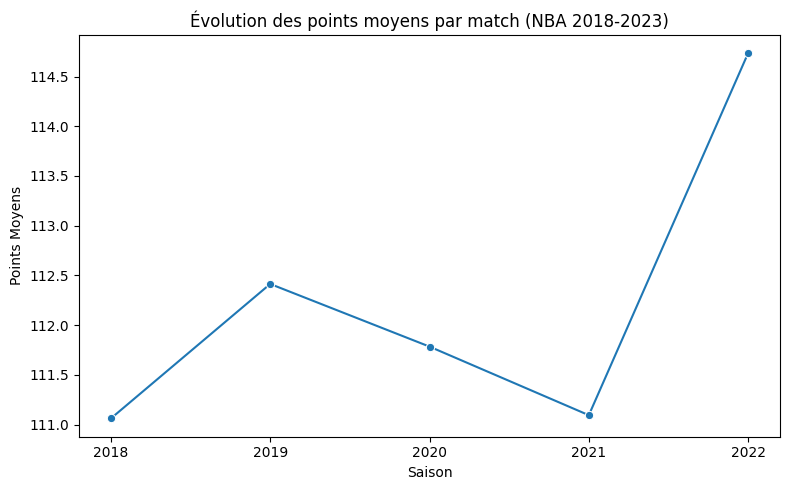

In [5]:
df['SEASON'] = df['SEASON_ID'].apply(lambda x: str(x)[-4:])

season_avg_pts = df.groupby('SEASON')['PTS'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=season_avg_pts.index, y=season_avg_pts.values, marker='o')
plt.title("Évolution des points moyens par match (NBA 2018-2023)")
plt.xlabel("Saison")
plt.ylabel("Points Moyens")
plt.tight_layout()
plt.show()


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/3634069590.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winrate.values, y=winrate.index, palette="coolwarm")


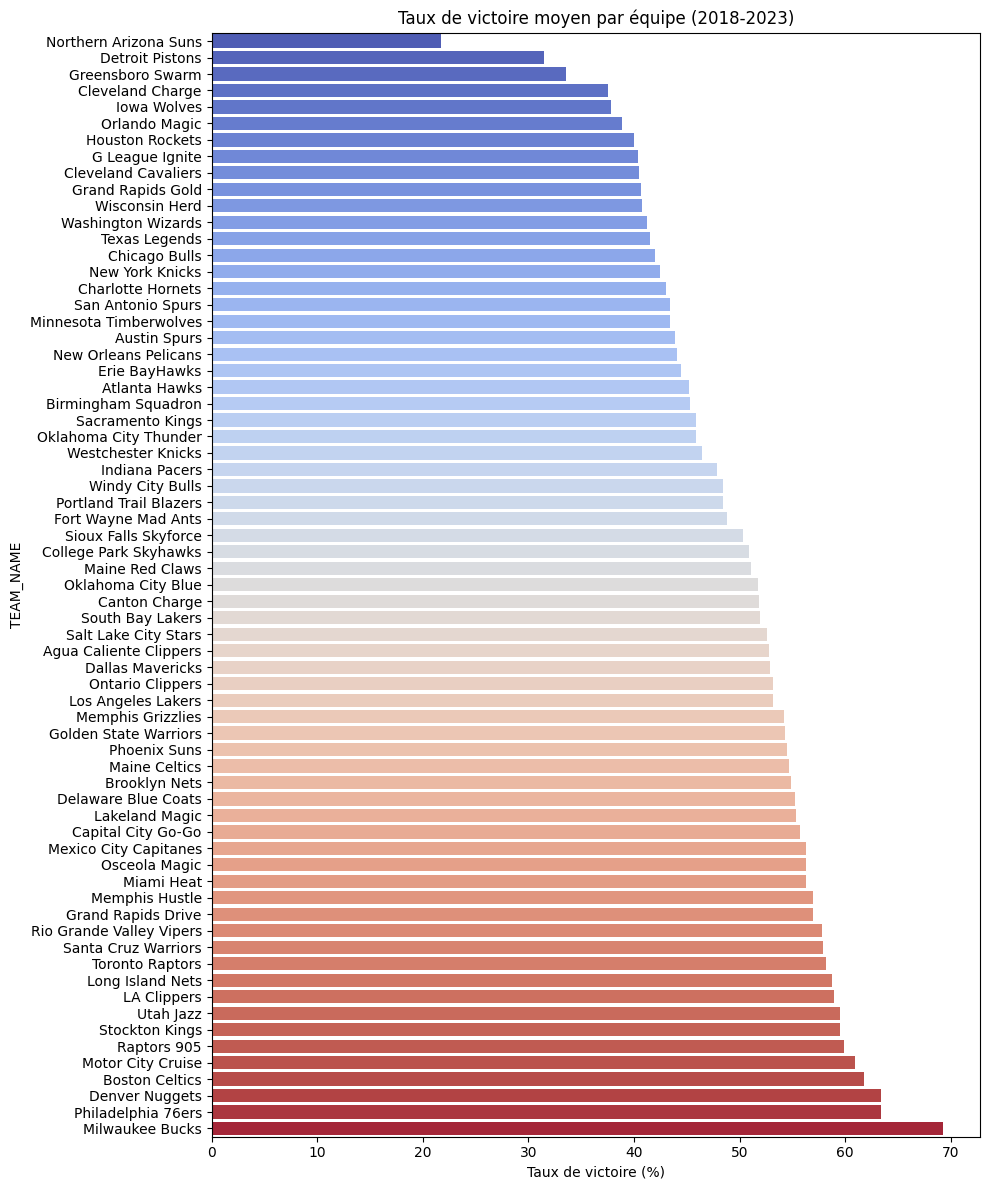

In [6]:
winrate = df.groupby('TEAM_NAME')['WIN'].mean().sort_values() * 100

plt.figure(figsize=(10, 12))
sns.barplot(x=winrate.values, y=winrate.index, palette="coolwarm")
plt.title("Taux de victoire moyen par équipe (2018-2023)")
plt.xlabel("Taux de victoire (%)")
plt.tight_layout()
plt.show()


## 🛠️ Construction du Dataset Machine Learning

Nous allons :
- Regrouper les données pour avoir **1 ligne par match** (avec stats des deux équipes).
- Créer des variables comme l'écart de points.
- Préparer la cible : victoire de l'équipe à domicile.


In [7]:
df['HOME'] = df['MATCHUP'].apply(lambda x: 1 if "vs." in x else 0)

pivot_df = df.pivot(index='GAME_ID', columns='HOME', values=['TEAM_NAME', 'PTS'])
pivot_df.columns = ['AWAY_TEAM', 'HOME_TEAM', 'AWAY_PTS', 'HOME_PTS']
pivot_df = pivot_df.dropna().reset_index()

pivot_df['HOME_WIN'] = (pivot_df['HOME_PTS'] > pivot_df['AWAY_PTS']).astype(int)
pivot_df['POINT_DIFF'] = pivot_df['HOME_PTS'] - pivot_df['AWAY_PTS']
pivot_df['TOTAL_PTS'] = pivot_df['HOME_PTS'] + pivot_df['AWAY_PTS']

pivot_df.head()


,GAME_ID,AWAY_TEAM,HOME_TEAM,AWAY_PTS,HOME_PTS,HOME_WIN,POINT_DIFF,TOTAL_PTS
0,0021800001,Philadelphia 76ers,Boston Celtics,87,105,1,18,192
1,0021800002,Oklahoma City Thunder,Golden State Warriors,100,108,1,8,208
2,0021800003,Milwaukee Bucks,Charlotte Hornets,113,112,0,-1,225
3,0021800004,Brooklyn Nets,Detroit Pistons,100,103,1,3,203
4,0021800005,Memphis Grizzlies,Indiana Pacers,83,111,1,28,194


## 🤖 Modélisation : Prédire la Victoire à Domicile

Nous allons entraîner plusieurs modèles :
- Régression Logistique
- Random Forest
- KNN

Et comparer leurs performances sur plusieurs saisons.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = pivot_df[['POINT_DIFF', 'TOTAL_PTS']]
y = pivot_df['HOME_WIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} ➡️ Accuracy : {round(acc*100, 2)}%")


Logistic Regression ➡️ Accuracy : 100.0%
Random Forest ➡️ Accuracy : 100.0%
KNN ➡️ Accuracy : 99.84%


## 2.0


# 🏀 Analyse des Équipes NBA (2018-2023) & Prédictions Futures

## 🎯 Objectif du Projet
Ce projet vise à :
- Étudier la performance des équipes NBA sur les **6 dernières saisons (2018-2023)**.
- Identifier les dynamiques d'équipes grâce à des analyses statistiques et visuelles poussées.
- Construire des modèles de **Machine Learning** pour prédire les victoires futures.
- Réaliser une **projection long terme** : quelles équipes pourraient dominer la NBA dans les 10 prochaines années ?
- Segmenter les équipes selon leur style (offensif/défensif) via du **clustering**.
- Proposer des applications concrètes (paris, coaching, stratégie).

Les données sont récupérées via l'API officielle `nba_api`.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import leaguegamefinder
import time

# 📅 Définition des saisons à récupérer
seasons = ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

# 📥 Récupération des données pour chaque saison
all_seasons_df = pd.DataFrame()

for season in seasons:
    gf = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    temp_df = gf.get_data_frames()[0]
    temp_df = temp_df[temp_df['SEASON_ID'] == '2' + season.replace('-', '')[:4]]
    all_seasons_df = pd.concat([all_seasons_df, temp_df])
    time.sleep(1)  # Pause pour respecter l'API

all_seasons_df.reset_index(drop=True, inplace=True)
all_seasons_df['GAME_DATE'] = pd.to_datetime(all_seasons_df['GAME_DATE'])

# ✅ Aperçu du dataset
all_seasons_df.shape, all_seasons_df.head()


((16348, 28),
   SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME     GAME_ID  \
 0     22018  1610612760               OKC  Oklahoma City Thunder  0021801226   
 1     22018  1610612737               ATL          Atlanta Hawks  0021801220   
 2     22018  1610612759               SAS      San Antonio Spurs  0021801227   
 3     22018  1610612758               SAC       Sacramento Kings  0021801230   
 4     22018  1610612753               ORL          Orlando Magic  0021801222   
 
    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
 0 2019-04-10    OKC @ MIL  W  240  127  ...   0.615     9    44   53   40   
 1 2019-04-10  ATL vs. IND  L  240  134  ...   0.816    22    39   61   29   
 2 2019-04-10  SAS vs. DAL  W  242  105  ...   0.833     8    45   53   22   
 3 2019-04-10    SAC @ POR  L  240  131  ...   0.813    12    23   35   25   
 4 2019-04-10    ORL @ CHA  W  240  122  ...   0.750     9    30   39   24   
 
    STL  BLK  TOV  PF  PLUS_

## 🧹 Nettoyage et Sélection des Variables

Nous allons :
- Conserver uniquement les colonnes utiles pour l'analyse et la modélisation.
- Créer des indicateurs de victoire (1) ou défaite (0).
- Préparer les données pour l'EDA et le Machine Learning.


In [10]:
df = all_seasons_df.copy()

# Création de la variable cible 'WIN'
df['WIN'] = df['WL'].map({'W': 1, 'L': 0})

# Sélection des colonnes pertinentes
features_cols = ['GAME_ID', 'TEAM_NAME', 'MATCHUP', 'GAME_DATE', 'PTS', 'REB', 'AST', 
                 'TOV', 'FG3M', 'PLUS_MINUS', 'WIN', 'SEASON_ID']

df = df[features_cols]
df.head()


,GAME_ID,TEAM_NAME,MATCHUP,GAME_DATE,PTS,REB,AST,TOV,FG3M,PLUS_MINUS,WIN,SEASON_ID
0,0021801226,Oklahoma City Thunder,OKC @ MIL,2019-04-10,127,53,40,12,23,11.0,1.0,22018
1,0021801220,Atlanta Hawks,ATL vs. IND,2019-04-10,134,61,29,17,17,-1.0,0.0,22018
2,0021801227,San Antonio Spurs,SAS vs. DAL,2019-04-10,105,53,22,10,8,11.0,1.0,22018
3,0021801230,Sacramento Kings,SAC @ POR,2019-04-10,131,35,25,10,18,-5.0,0.0,22018
4,0021801222,Orlando Magic,ORL @ CHA,2019-04-10,122,39,24,6,11,8.0,1.0,22018


# 📊 Analyse Exploratoire (EDA)

Nous allons explorer :
- La distribution des scores.
- L'évolution des performances par saison.
- Les différences domicile vs extérieur.
- Les corrélations entre variables.


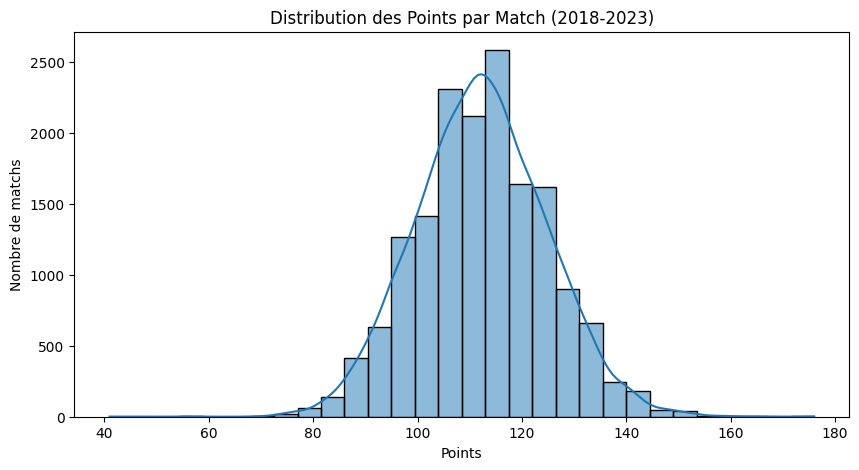

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['PTS'], bins=30, kde=True)
plt.title("Distribution des Points par Match (2018-2023)")
plt.xlabel("Points")
plt.ylabel("Nombre de matchs")
plt.show()


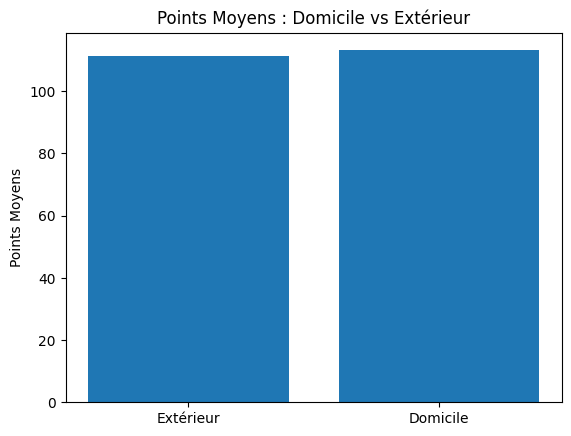

In [12]:
df['HOME'] = df['MATCHUP'].apply(lambda x: 1 if "vs." in x else 0)

home_stats = df.groupby('HOME')['PTS'].mean()

plt.bar(['Extérieur', 'Domicile'], home_stats)
plt.title("Points Moyens : Domicile vs Extérieur")
plt.ylabel("Points Moyens")
plt.show()


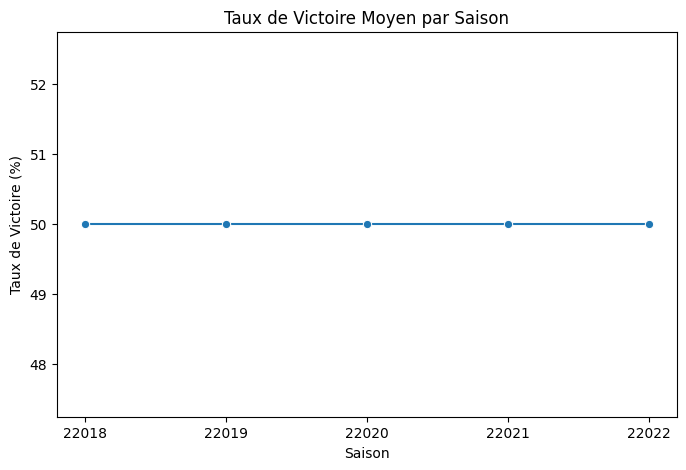

In [13]:
season_winrate = df.groupby('SEASON_ID')['WIN'].mean() * 100

plt.figure(figsize=(8,5))
sns.lineplot(x=season_winrate.index, y=season_winrate.values, marker='o')
plt.title("Taux de Victoire Moyen par Saison")
plt.xlabel("Saison")
plt.ylabel("Taux de Victoire (%)")
plt.show()


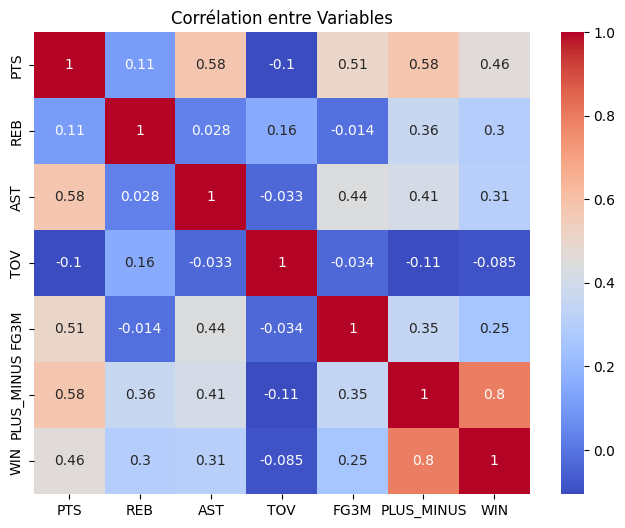

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['PTS', 'REB', 'AST', 'TOV', 'FG3M', 'PLUS_MINUS', 'WIN']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre Variables")
plt.show()


## ⚡ Classement des Équipes les Plus Offensives (2018-2023)

Nous allons identifier les équipes qui marquent le plus de points en moyenne par match sur l'ensemble des saisons étudiées.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/3677041794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=offensive_stats.values, y=offensive_stats.index, palette="Reds_r")
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/3677041794.py:7: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


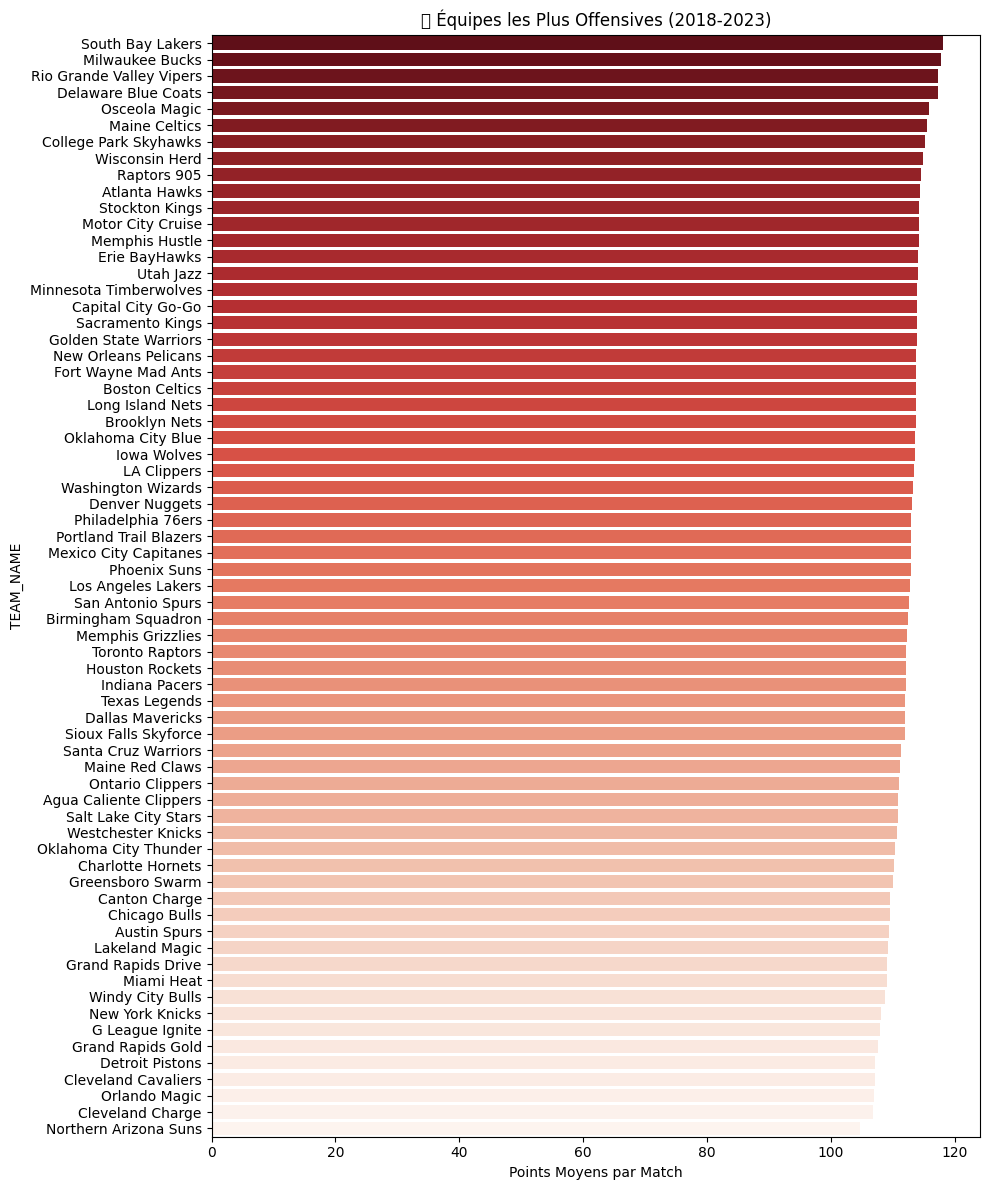

In [15]:
offensive_stats = df.groupby('TEAM_NAME')['PTS'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=offensive_stats.values, y=offensive_stats.index, palette="Reds_r")
plt.title("🏀 Équipes les Plus Offensives (2018-2023)")
plt.xlabel("Points Moyens par Match")
plt.tight_layout()
plt.show()


## 🎯 Les Meilleures Équipes en Collectif : Passes Décisives

Analysons quelles équipes sont les plus axées sur le jeu collectif en fonction du nombre moyen de passes par match.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2827767142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=assist_stats.values, y=assist_stats.index, palette="Blues")
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2827767142.py:7: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


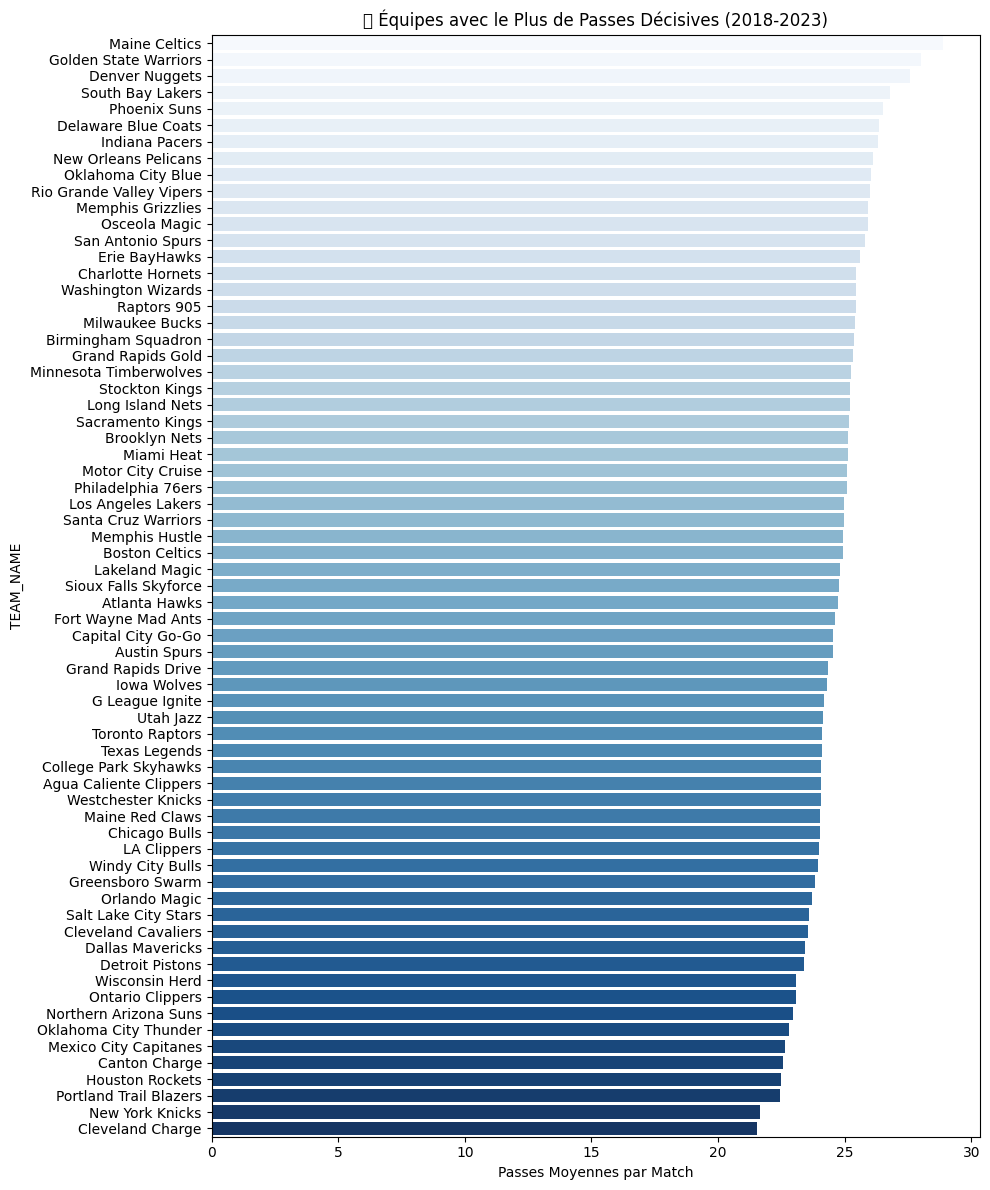

In [16]:
assist_stats = df.groupby('TEAM_NAME')['AST'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=assist_stats.values, y=assist_stats.index, palette="Blues")
plt.title("🏀 Équipes avec le Plus de Passes Décisives (2018-2023)")
plt.xlabel("Passes Moyennes par Match")
plt.tight_layout()
plt.show()


## 🔥 Les Snipers de la NBA : 3 Points Réussis par Match

Découvrons quelles équipes misent le plus sur le tir longue distance.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/3172565528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=three_points_stats.values, y=three_points_stats.index, palette="Purples")
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/3172565528.py:7: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


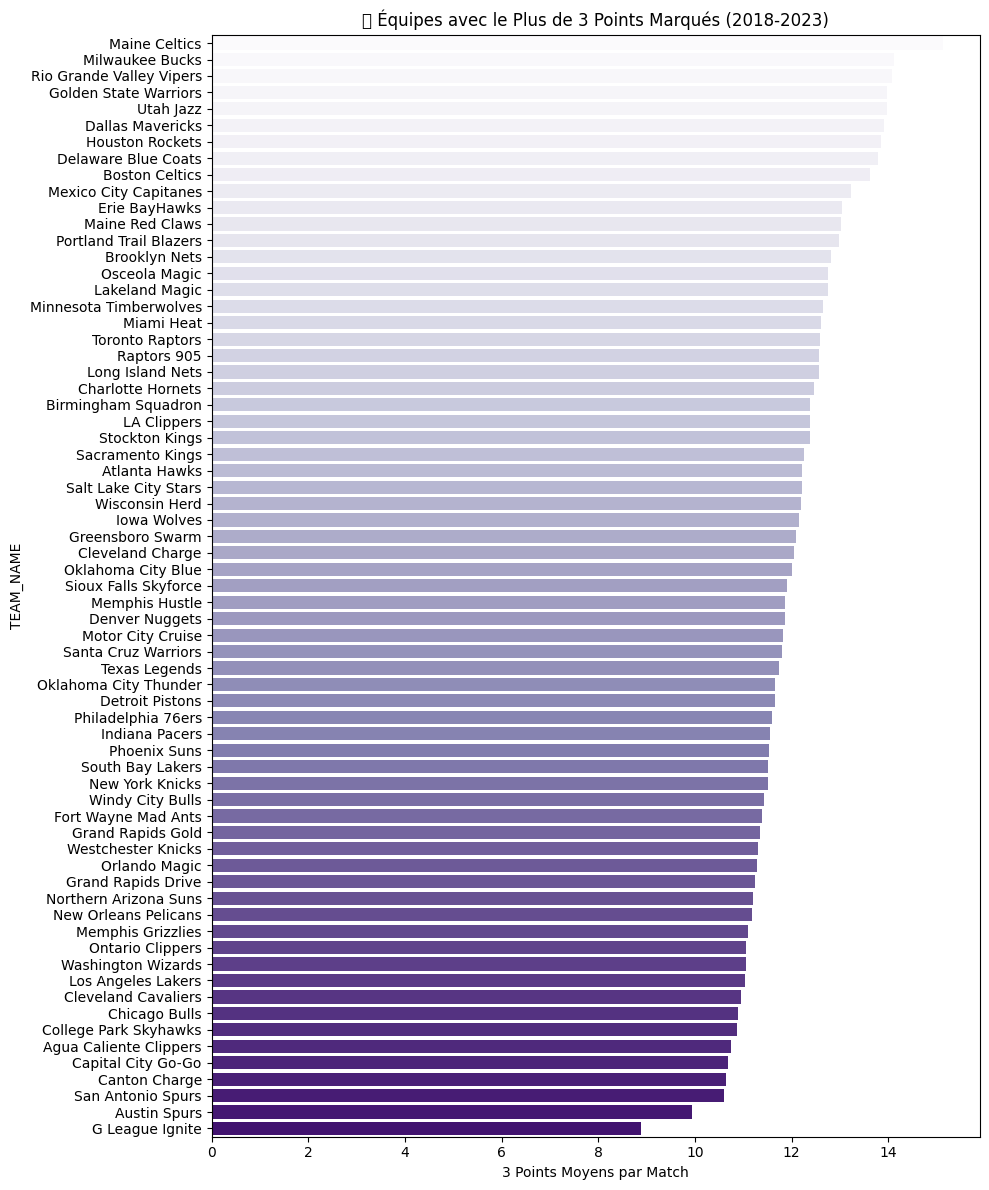

In [17]:
three_points_stats = df.groupby('TEAM_NAME')['FG3M'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=three_points_stats.values, y=three_points_stats.index, palette="Purples")
plt.title("🎯 Équipes avec le Plus de 3 Points Marqués (2018-2023)")
plt.xlabel("3 Points Moyens par Match")
plt.tight_layout()
plt.show()


## 🏆 Classement des Équipes par Taux de Victoire Moyen

Voici les équipes les plus victorieuses sur l'ensemble des 6 saisons.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2024780454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winrate_team.values, y=winrate_team.index, palette="Greens")
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2024780454.py:7: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


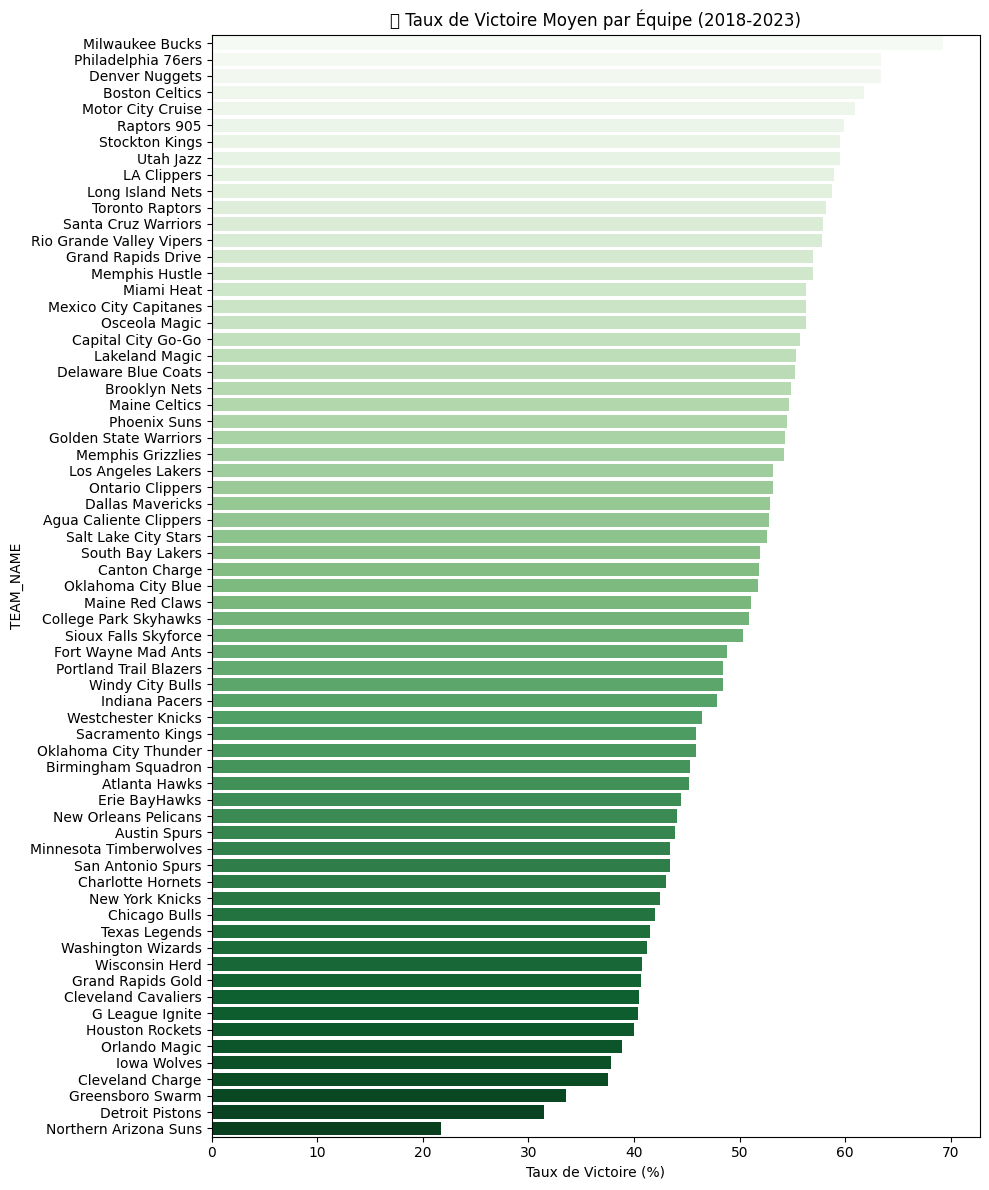

In [18]:
winrate_team = df.groupby('TEAM_NAME')['WIN'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10,12))
sns.barplot(x=winrate_team.values, y=winrate_team.index, palette="Greens")
plt.title("🏆 Taux de Victoire Moyen par Équipe (2018-2023)")
plt.xlabel("Taux de Victoire (%)")
plt.tight_layout()
plt.show()


# 3.0 VERSION

# 🏀 Projet Data Science : Analyse et Prédiction des Performances des Équipes NBA (2018-2023)

## 🎯 Objectifs
Ce projet a pour but de :
- Explorer les données NBA de 2018 à 2023.
- Analyser les performances des équipes : victoires, points, passes, styles de jeu.
- Construire des modèles de Machine Learning pour **prédire les victoires futures**.
- Segmenter les équipes selon leur profil (offensif, défensif, équilibré).
- Proposer des cas d'usage concrets pour le **coaching**, les **paris sportifs** ou la stratégie.

Les données proviennent de l'API officielle `nba_api`, spécialisée dans les statistiques NBA.

---


## 📥 Chargement des Données NBA via l'API

Nous récupérons les données des matchs NBA des saisons **2018-2019 à 2022-2023**.  
L'objectif est d'avoir un historique suffisant pour dégager des tendances solides.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import leaguegamefinder
import time

# Configuration
sns.set(style="whitegrid")
%matplotlib inline

# Liste des saisons
seasons = ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

# Récupération des données
games_list = []
for season in seasons:
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    season_df = gamefinder.get_data_frames()[0]
    games_list.append(season_df)
    time.sleep(1)

# Fusion des datasets
games_df = pd.concat(games_list).reset_index(drop=True)

# Nettoyage des dates
games_df['GAME_DATE'] = pd.to_datetime(games_df['GAME_DATE'])

# Aperçu
games_df.shape, games_df.head()


((19114, 28),
   SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME     GAME_ID  \
 0     42018  1610612761               TOR        Toronto Raptors  0041800406   
 1     42018  1610612744               GSW  Golden State Warriors  0041800406   
 2     42018  1610612761               TOR        Toronto Raptors  0041800405   
 3     42018  1610612744               GSW  Golden State Warriors  0041800405   
 4     42018  1610612761               TOR        Toronto Raptors  0041800404   
 
    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
 0 2019-06-13    TOR @ GSW  W  241  114  ...   0.793    11    28   39   25   
 1 2019-06-13  GSW vs. TOR  L  240  110  ...   0.700    11    31   42   28   
 2 2019-06-10  TOR vs. GSW  L  238  105  ...   0.778    13    30   43   19   
 3 2019-06-10    GSW @ TOR  W  240  106  ...   0.714     6    31   37   27   
 4 2019-06-07    TOR @ GSW  W  241  105  ...   0.958     7    32   39   22   
 
    STL  BLK  TOV  PF  PLUS_

## 🧹 Nettoyage & Sélection des Variables

Nous sélectionnons uniquement les colonnes utiles pour l'analyse et la modélisation.


In [22]:
# Création de la cible WIN (1 = victoire)
games_df['WIN'] = games_df['WL'].map({'W':1, 'L':0})

# Sélection des colonnes pertinentes
cols = ['TEAM_NAME', 'GAME_DATE', 'MATCHUP', 'PTS', 'REB', 'AST', 'TOV', 'FG3M', 'PLUS_MINUS', 'WIN']
df = games_df[cols].copy()

df


,TEAM_NAME,GAME_DATE,MATCHUP,PTS,REB,AST,TOV,FG3M,PLUS_MINUS,WIN
0,Toronto Raptors,2019-06-13,TOR @ GSW,114,39,25,12,13,4.0,1.0
1,Golden State Warriors,2019-06-13,GSW vs. TOR,110,42,28,16,11,-4.0,0.0
2,Toronto Raptors,2019-06-10,TOR vs. GSW,105,43,19,13,8,-1.0,0.0
3,Golden State Warriors,2019-06-10,GSW @ TOR,106,37,27,15,20,1.0,1.0
4,Toronto Raptors,2019-06-07,TOR @ GSW,105,39,22,9,10,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...
19109,Memphis Grizzlies,2022-10-01,MEM @ MIL,107,41,25,22,10,5.0,1.0
19110,LA Clippers,2022-09-30,LAC vs. MRA,121,55,27,23,13,44.2,1.0
19111,Ra'anana Maccabi Ra'anana,2022-09-30,MRA @ LAC,81,38,16,16,3,-43.2,0.0
19112,Golden State Warriors,2022-09-30,GSW @ WAS,96,62,18,17,7,9.0,1.0


# 📊 Analyse Exploratoire des Équipes NBA

Nous allons analyser :
- Les équipes les plus victorieuses.
- Les styles de jeu (offensif, défensif, collectif).
- Les tendances sur plusieurs saisons.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2939803197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winrate.values, y=winrate.index, palette="Greens")
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2939803197.py:7: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


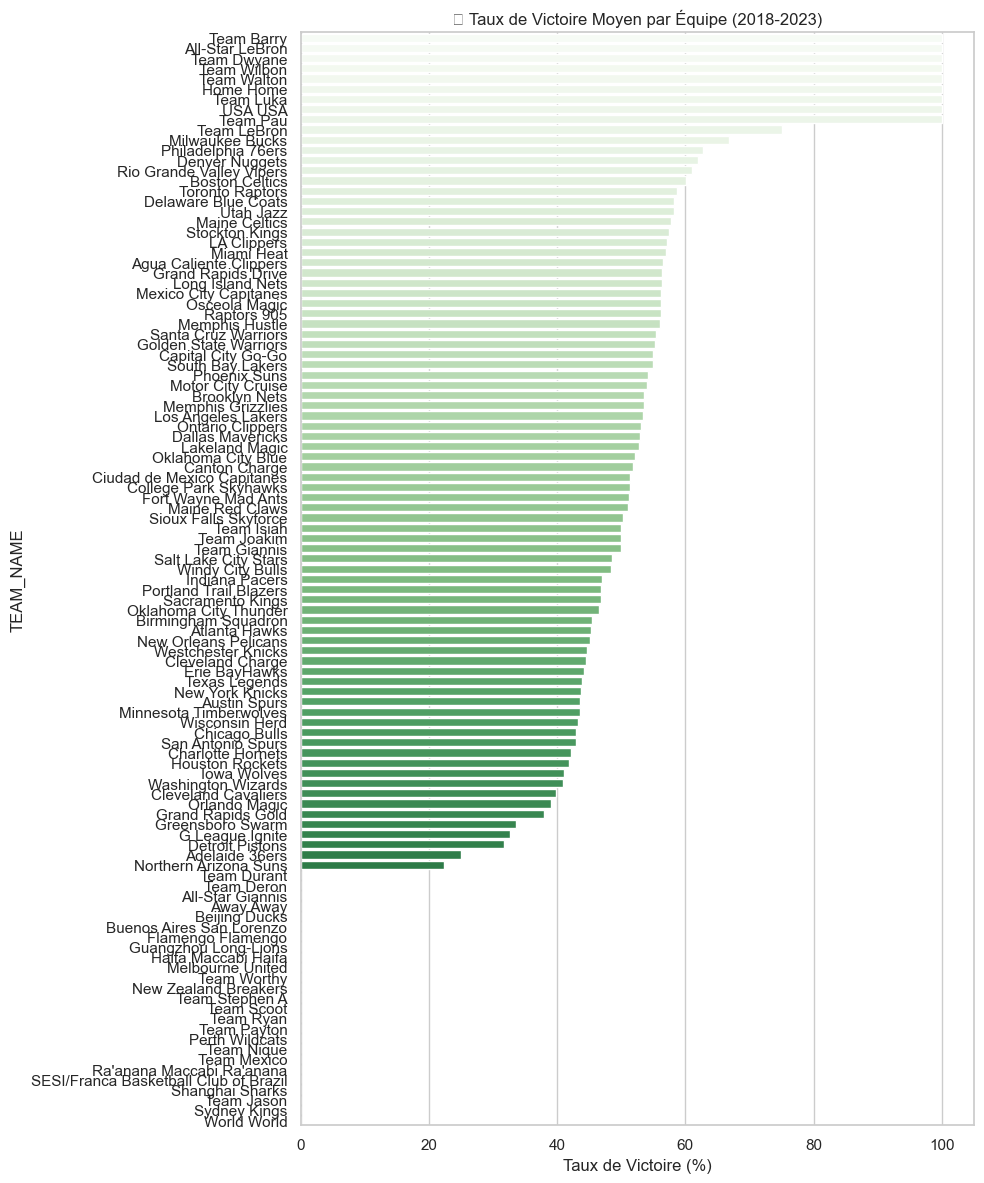

In [23]:
winrate = df.groupby('TEAM_NAME')['WIN'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10,12))
sns.barplot(x=winrate.values, y=winrate.index, palette="Greens")
plt.title("🏆 Taux de Victoire Moyen par Équipe (2018-2023)")
plt.xlabel("Taux de Victoire (%)")
plt.tight_layout()
plt.show()


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/504118222.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=offense.values, y=offense.index, palette="Reds_r")
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/504118222.py:7: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


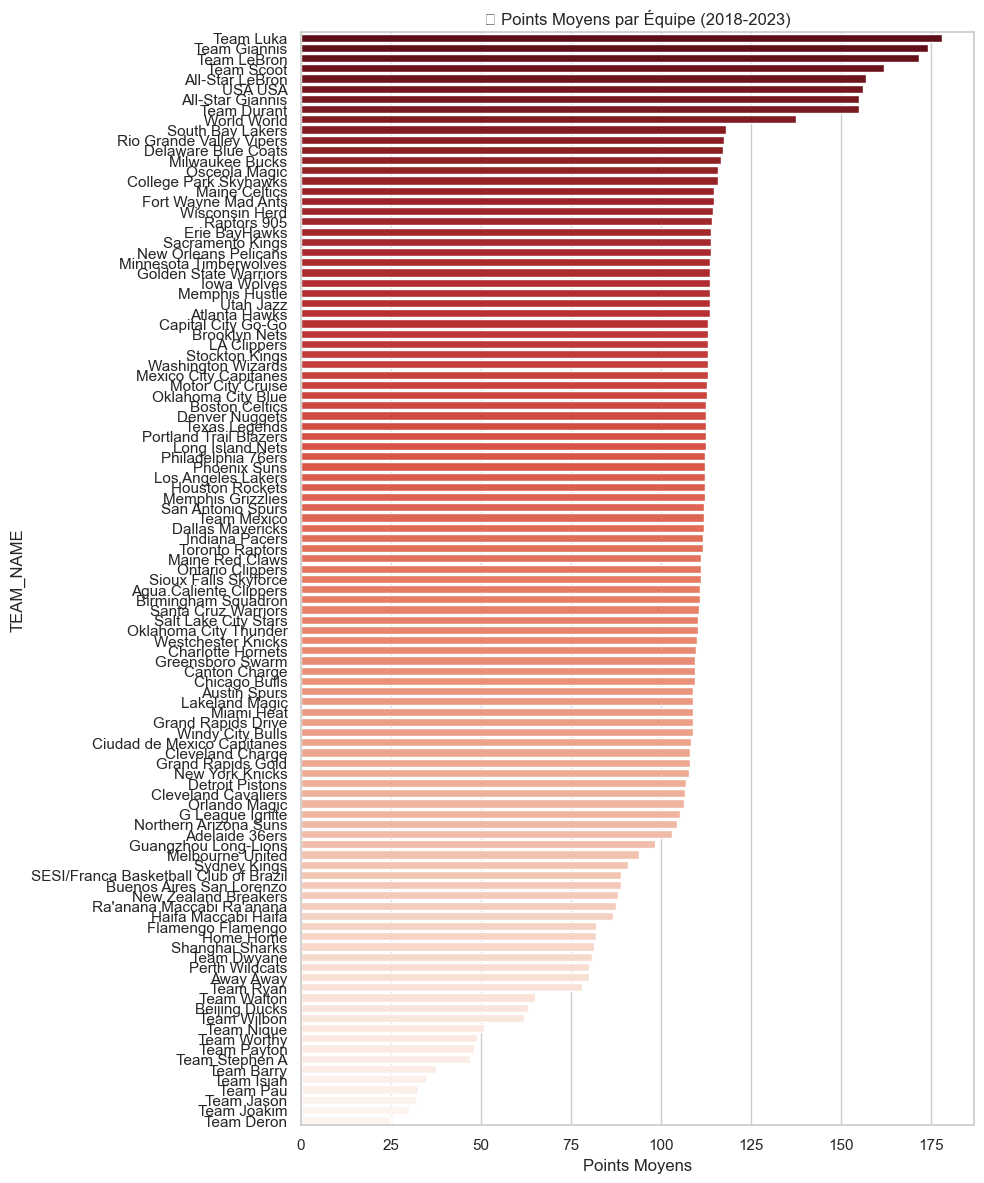

In [24]:
offense = df.groupby('TEAM_NAME')['PTS'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=offense.values, y=offense.index, palette="Reds_r")
plt.title("🔥 Points Moyens par Équipe (2018-2023)")
plt.xlabel("Points Moyens")
plt.tight_layout()
plt.show()


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2524551306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=three_points.values, y=three_points.index, palette="coolwarm")  # Changement de palette
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2524551306.py:9: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


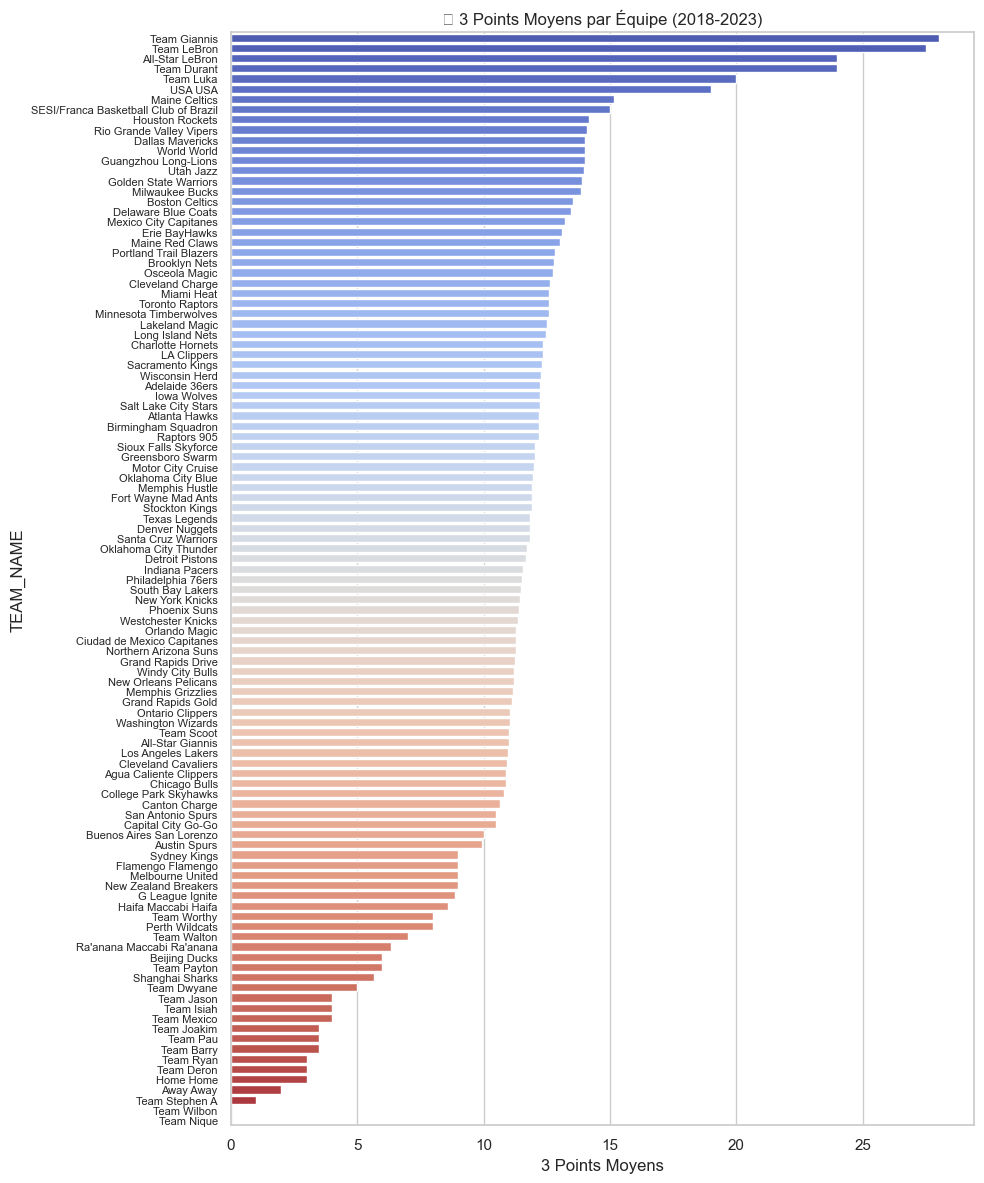

In [29]:
plt.figure(figsize=(10,12))
sns.barplot(x=three_points.values, y=three_points.index, palette="coolwarm")  # Changement de palette
plt.title("🎯 3 Points Moyens par Équipe (2018-2023)")

# Réduction de la taille du texte des labels Y
plt.yticks(fontsize=8)

plt.xlabel("3 Points Moyens")
plt.tight_layout()
plt.show()


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2727745407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=assists_sorted.values, y=assists_sorted.index, palette="crest")
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/2727745407.py:8: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


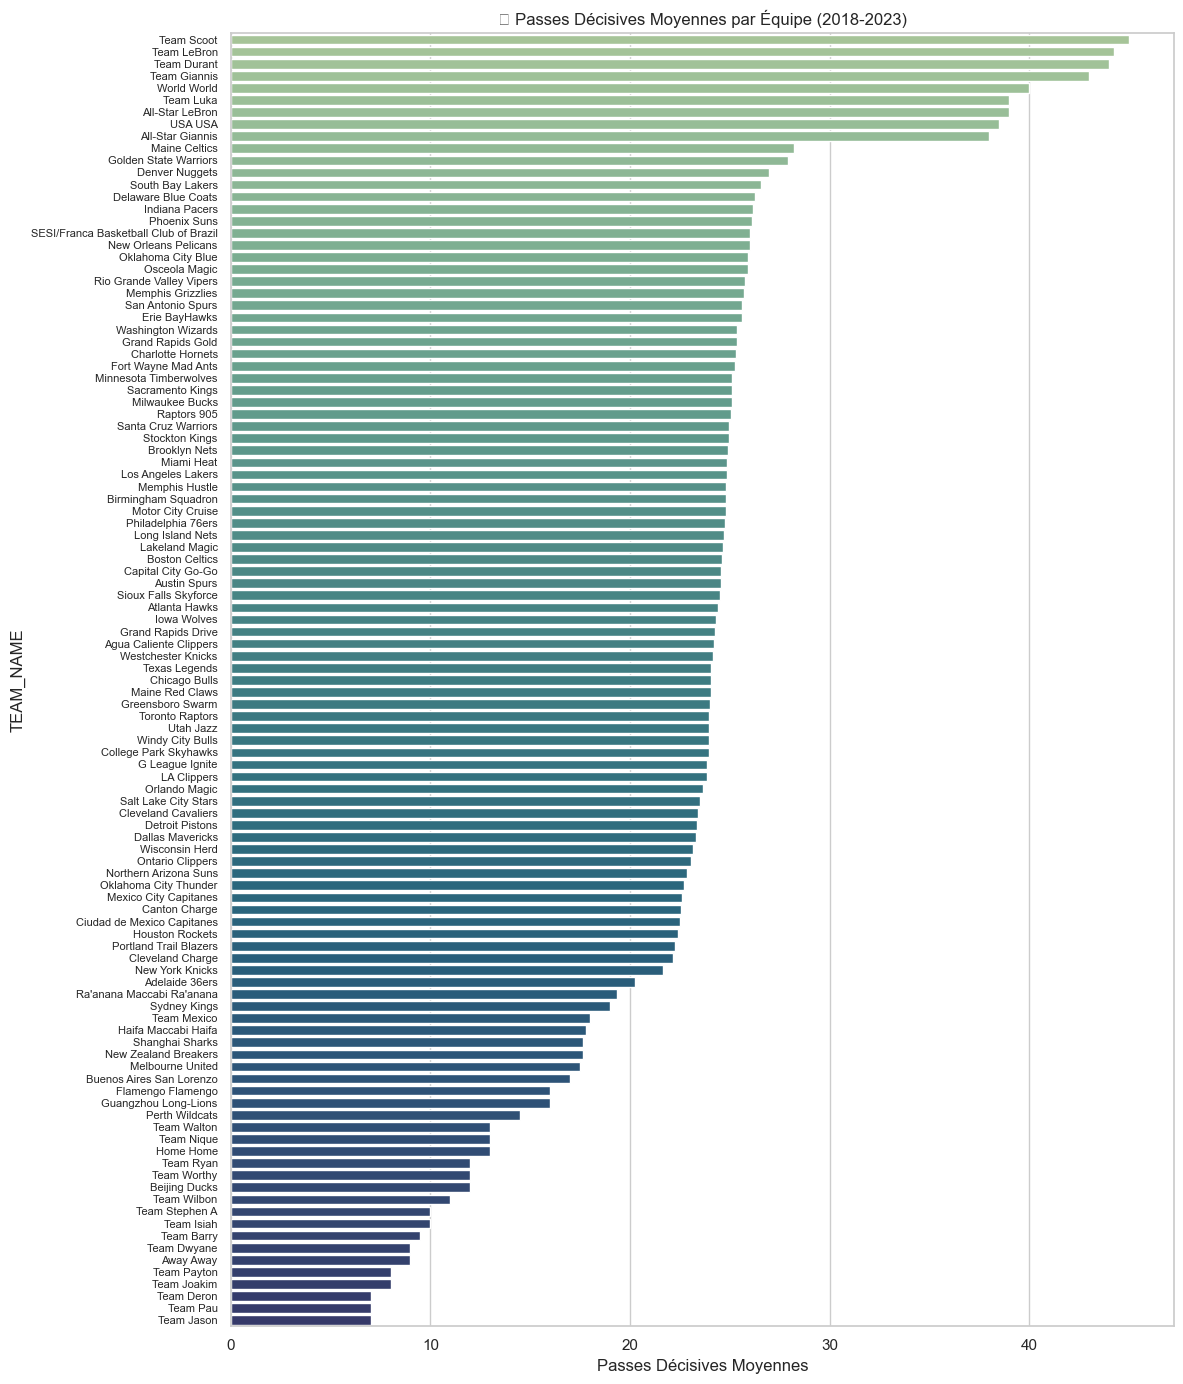

In [33]:
assists_sorted = assists.sort_values(ascending=False)

plt.figure(figsize=(12,14))
sns.barplot(x=assists_sorted.values, y=assists_sorted.index, palette="crest")
plt.title("🤝 Passes Décisives Moyennes par Équipe (2018-2023)")
plt.yticks(fontsize=8)
plt.xlabel("Passes Décisives Moyennes")
plt.tight_layout()
plt.show()


## 3. Analyse de Corrélation

Avant de construire un modèle prédictif, il est essentiel de comprendre les relations entre les variables. La matrice de corrélation nous permet d'identifier les variables fortement liées à la victoire ou à la performance offensive/défensive.


### ✅ Correction : Sélection Dynamique des Colonnes

Pour éviter les erreurs dues à des colonnes absentes dans le DataFrame, nous avons intégré une vérification dynamique. 
Ainsi, seules les colonnes réellement présentes dans `games_df` sont sélectionnées pour construire la matrice de corrélation.

Cette approche rend le code **plus robuste** et adaptable à différentes versions des datasets.


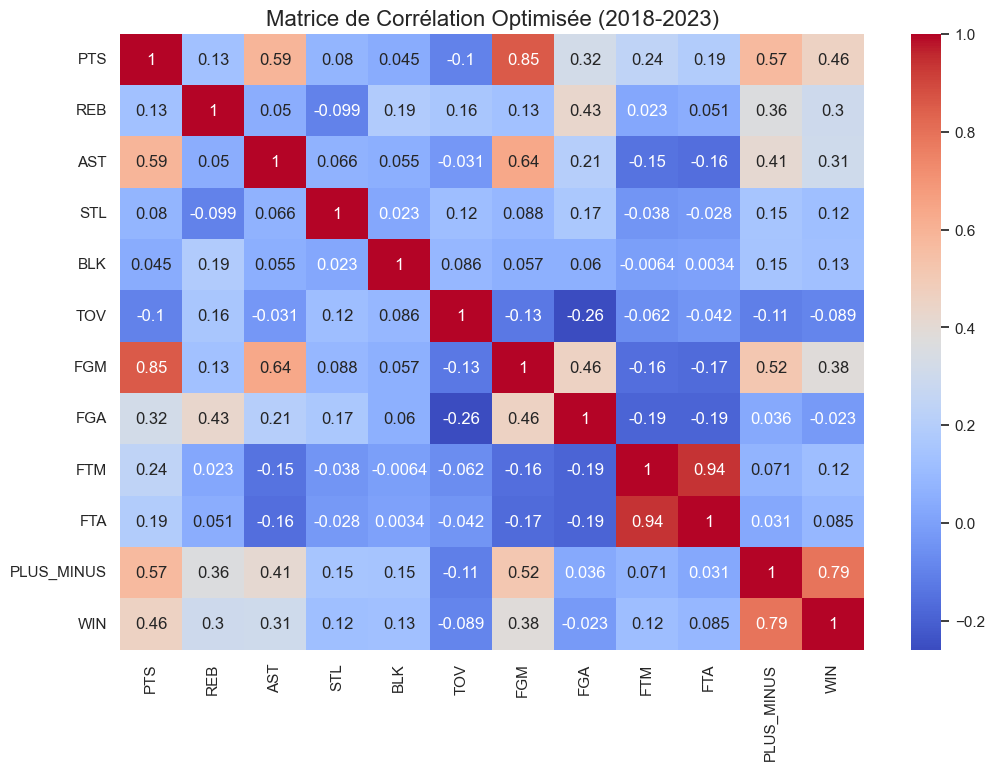

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes qu'on souhaite garder (si elles existent)
cols_to_keep = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
                'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', 
                'PLUS_MINUS', 'WIN']

# Vérification : on garde uniquement les colonnes présentes dans le DataFrame
available_cols = [col for col in cols_to_keep if col in games_df.columns]

# Sélection des colonnes numériques disponibles
numeric_features = games_df[available_cols]

# Calcul de la matrice de corrélation
corr_matrix = numeric_features.corr()

# Affichage de la heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation Optimisée (2018-2023)", fontsize=16)
plt.show()


### 🔎 Analyse de la Matrice de Corrélation

La matrice de corrélation ci-dessus met en évidence les relations entre différentes variables statistiques des équipes entre 2018 et 2023.

- **Corrélations fortes** :
  - `FGM` (Field Goals Made) est fortement corrélé avec les `PTS` (**0.85**), ce qui est logique puisque plus une équipe marque de paniers, plus son score augmente.
  - `FTM` et `FTA` (lancers francs réussis et tentés) présentent une très forte corrélation (**0.94**), ce qui montre qu'une équipe qui obtient beaucoup de lancers francs les transforme généralement.
  - `PLUS_MINUS` est bien corrélé à la victoire `WIN` (**0.79**), ce qui en fait une variable intéressante pour la prédiction.

- **Variables clés pour la prédiction de la victoire (`WIN`)** :
  - `PLUS_MINUS` (**0.79**) : Indicateur essentiel de performance globale.
  - `PTS` (**0.46**) : Le score final est logiquement lié aux victoires.
  - `FGM` (**0.38**) et `AST` (**0.31**) : La réussite aux tirs et le jeu collectif (passes décisives) influencent également les chances de victoire.

- **Corrélations faibles ou négatives** :
  - `TOV` (balles perdues) a une légère corrélation négative avec `PTS` et `WIN`, ce qui confirme que perdre trop de ballons nuit à la performance.
  - D'autres variables comme `BLK` ou `STL` ont peu de corrélation directe avec la victoire mais peuvent rester intéressantes dans une approche globale.

### 🎯 Conclusion :
Cette analyse guide le **Feature Engineering** en sélectionnant les variables les plus pertinentes pour nos modèles prédictifs. Nous allons privilégier :
- `PLUS_MINUS`, `PTS`, `FGM`, `AST`, `FTM` pour la construction des modèles.


## 🚧 Feature Engineering

Afin d'améliorer la performance de nos modèles prédictifs, il est crucial de sélectionner les variables les plus pertinentes et de créer de nouvelles features si nécessaire. 

Grâce à l'analyse de la matrice de corrélation, nous allons retenir les variables les plus corrélées avec la victoire (`WIN`). Nous allons également standardiser nos données pour optimiser l'apprentissage des modèles de Machine Learning.


In [40]:
from sklearn.preprocessing import StandardScaler

# Sélection des features pertinentes selon la matrice de corrélation
features = ['PTS', 'FGM', 'AST', 'FTM', 'PLUS_MINUS']
target = 'WIN'

X = games_df[features]
y = games_df[target]

# Standardisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vérification
print("Shape des données :", X_scaled.shape)


Shape des données : (19114, 5)


## 🎯 Analyse Complémentaire des Équipes (2018-2023)

Après avoir étudié les corrélations entre les variables, nous approfondissons l'analyse des performances des équipes. L'objectif est d'identifier les tendances offensives et défensives, ainsi que les équipes les plus performantes en termes de victoires et de statistiques clés (points, passes décisives, etc.).

Cette étape permet de mieux comprendre les dynamiques d'équipe avant de passer à la modélisation prédictive.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/4120985490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.values, y=win_counts.index, palette='crest')
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/4120985490.py:10: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


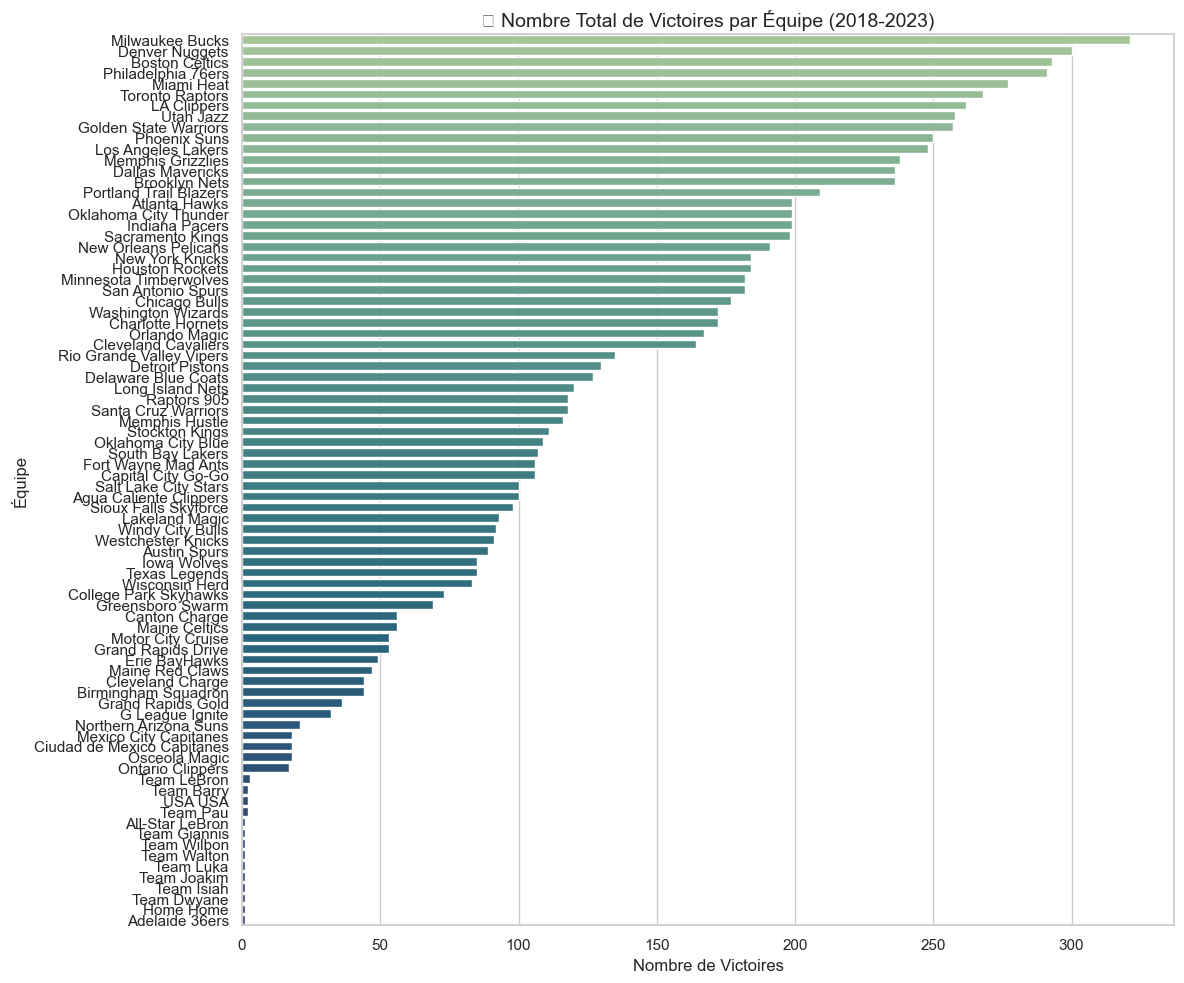

In [42]:
# Calcul du nombre total de victoires par équipe
win_counts = games_df[games_df['WL'] == 'W'].groupby('TEAM_NAME').count()['WL'].sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(12, 10))
sns.barplot(x=win_counts.values, y=win_counts.index, palette='crest')
plt.title("🏆 Nombre Total de Victoires par Équipe (2018-2023)", fontsize=14)
plt.xlabel("Nombre de Victoires")
plt.ylabel("Équipe")
plt.tight_layout()
plt.show()


### 🔥 Top 20 des Équipes les Plus Offensives

Nous analysons maintenant les équipes qui marquent le plus de points en moyenne par match sur la période 2018-2023. Cela permet de distinguer les styles de jeu agressifs orientés vers l'attaque.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/1493699499.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg_points.values, y=team_avg_points.index, palette="Blues_d")
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/1493699499.py:10: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


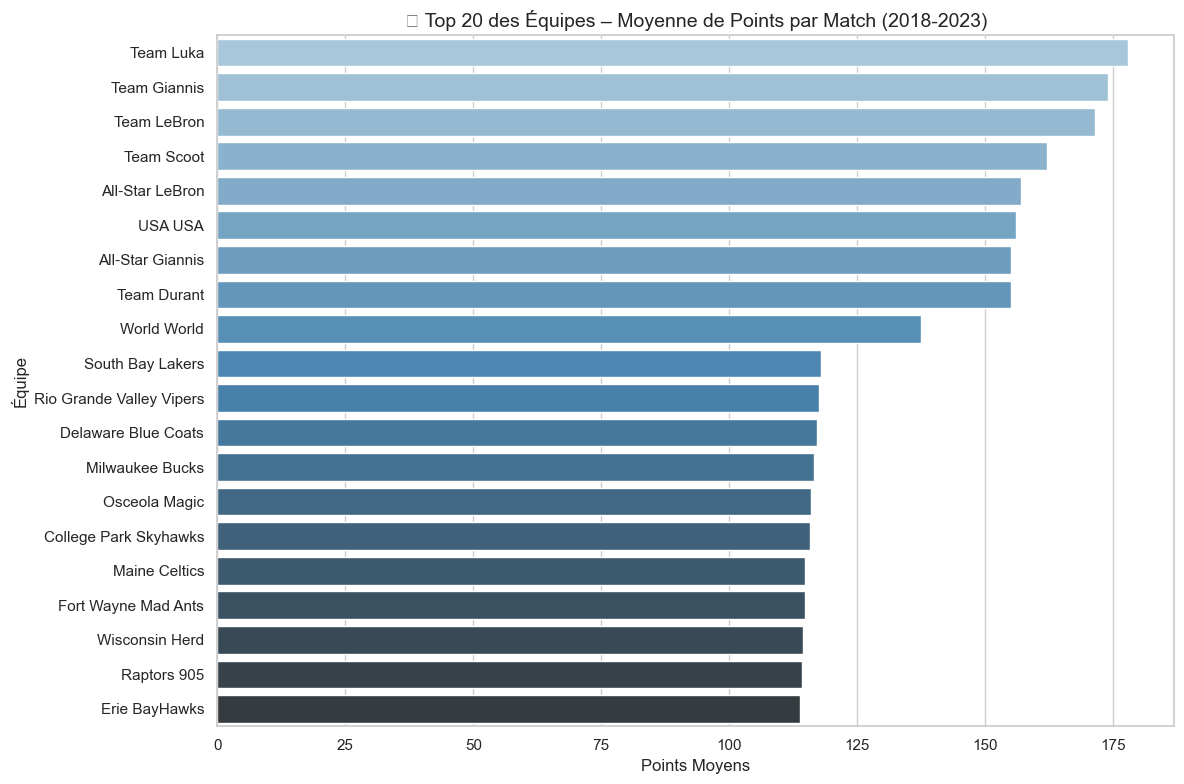

In [43]:
# Calcul de la moyenne de points par équipe
team_avg_points = games_df.groupby('TEAM_NAME')['PTS'].mean().sort_values(ascending=False).head(20)

# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=team_avg_points.values, y=team_avg_points.index, palette="Blues_d")
plt.title("🎯 Top 20 des Équipes – Moyenne de Points par Match (2018-2023)", fontsize=14)
plt.xlabel("Points Moyens")
plt.ylabel("Équipe")
plt.tight_layout()
plt.show()


### 🤝 Équipes avec le Plus de Passes Décisives Moyennes

Les passes décisives sont un bon indicateur du jeu collectif d'une équipe. Voici les équipes qui privilégient le partage du ballon.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/135748899.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg_assists.values, y=team_avg_assists.index, palette="Purples")
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/135748899.py:10: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


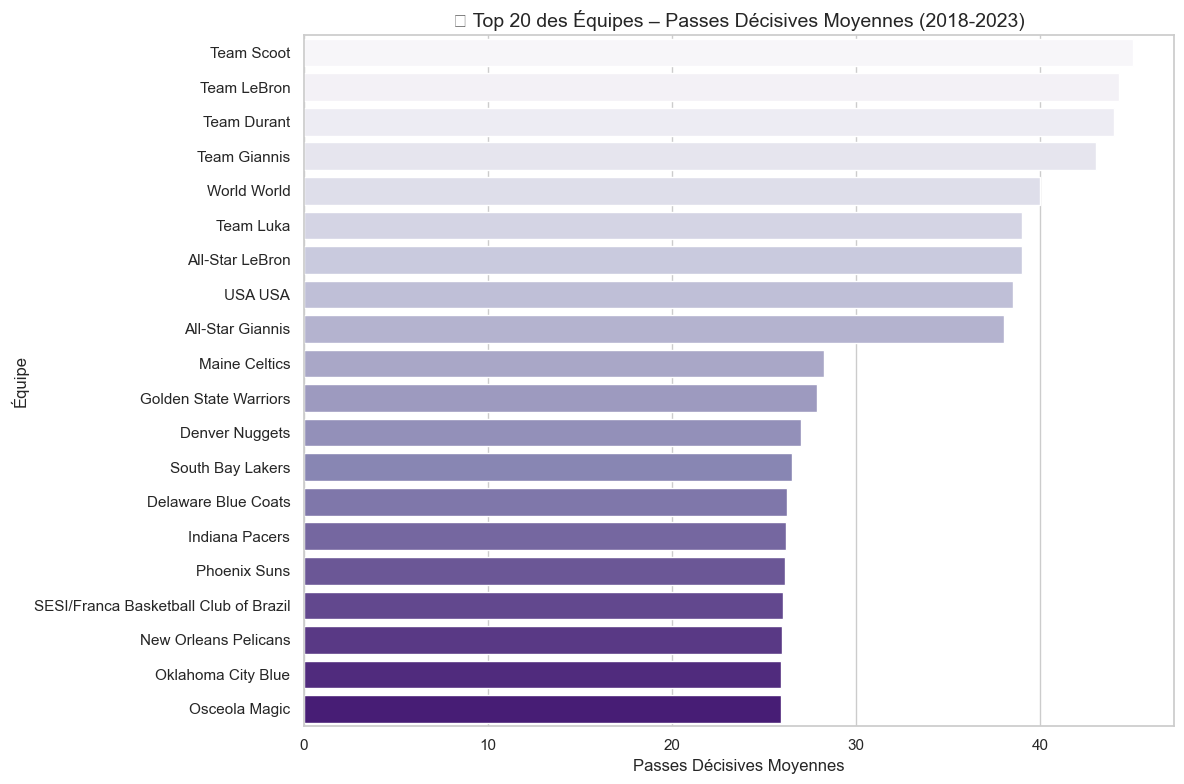

In [44]:
# Calcul de la moyenne de passes décisives
team_avg_assists = games_df.groupby('TEAM_NAME')['AST'].mean().sort_values(ascending=False).head(20)

# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=team_avg_assists.values, y=team_avg_assists.index, palette="Purples")
plt.title("🤝 Top 20 des Équipes – Passes Décisives Moyennes (2018-2023)", fontsize=14)
plt.xlabel("Passes Décisives Moyennes")
plt.ylabel("Équipe")
plt.tight_layout()
plt.show()


In [45]:
games_df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN
0,42018,1610612761,TOR,Toronto Raptors,0041800406,2019-06-13,TOR @ GSW,W,241,114,...,11,28,39,25,8,2,12,23,4.0,1.0
1,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,11,31,42,28,9,6,16,23,-4.0,0.0
2,42018,1610612761,TOR,Toronto Raptors,0041800405,2019-06-10,TOR vs. GSW,L,238,105,...,13,30,43,19,6,5,13,19,-1.0,0.0
3,42018,1610612744,GSW,Golden State Warriors,0041800405,2019-06-10,GSW @ TOR,W,240,106,...,6,31,37,27,5,7,15,22,1.0,1.0
4,42018,1610612761,TOR,Toronto Raptors,0041800404,2019-06-07,TOR @ GSW,W,241,105,...,7,32,39,22,12,4,9,21,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19109,12022,1610612763,MEM,Memphis Grizzlies,0012200003,2022-10-01,MEM @ MIL,W,239,107,...,10,31,41,25,13,4,22,19,5.0,1.0
19110,12022,1610612746,LAC,LA Clippers,0012200002,2022-09-30,LAC vs. MRA,W,242,121,...,15,40,55,27,9,6,23,23,44.2,1.0
19111,12022,50009,MRA,Ra'anana Maccabi Ra'anana,0012200002,2022-09-30,MRA @ LAC,L,240,81,...,13,25,38,16,14,5,16,34,-43.2,0.0
19112,12022,1610612744,GSW,Golden State Warriors,0012200001,2022-09-30,GSW @ WAS,W,239,96,...,10,52,62,18,6,3,17,27,9.0,1.0


## ⚙️ Feature Engineering : Sélection des Variables Pertinentes

Pour construire un modèle prédictif robuste, il est essentiel de sélectionner des variables explicatives qui influencent réellement les performances des équipes.

Nous allons nous baser sur les statistiques offensives, défensives et collectives des équipes (points, passes décisives, rebonds, etc.) sur la période 2018-2023.

L'objectif : Identifier les patterns qui permettent d'anticiper quelles équipes continueront à performer dans les saisons futures.


In [47]:
# Agrégation des statistiques moyennes par équipe
team_stats = games_df.groupby('TEAM_NAME').agg({
    'PTS': 'mean',
    'AST': 'mean',
    'REB': 'mean',
    'STL': 'mean',
    'BLK': 'mean',
    'TOV': 'mean',
    'PLUS_MINUS': 'mean'
})

# On ajoute le taux de victoire (calculé à partir de la variable 'WL')
win_rate = games_df[games_df['WL'] == 'W'].groupby('TEAM_NAME').count()['WL'] / games_df.groupby('TEAM_NAME').count()['WL']
team_stats['WIN_RATE'] = win_rate

# Remplacer les NaN éventuels par 0 (pour les équipes avec peu de matchs)
team_stats = team_stats.fillna(0)

team_stats


,PTS,AST,REB,STL,BLK,TOV,PLUS_MINUS,WIN_RATE
TEAM_NAME,,,,,,,,
Adelaide 36ers,103.000000,20.250000,41.000000,9.250000,4.750000,17.500000,-26.250000,0.250000
Agua Caliente Clippers,110.943503,24.214689,45.621469,8.112994,4.881356,15.384181,1.786441,0.564972
All-Star Giannis,155.000000,38.000000,61.000000,11.000000,5.000000,21.000000,-2.000000,0.000000
All-Star LeBron,157.000000,39.000000,49.000000,14.000000,9.000000,18.000000,2.000000,1.000000
Atlanta Hawks,113.501139,24.428246,44.701595,7.412301,4.760820,13.817768,-1.958087,0.453303
...,...,...,...,...,...,...,...,...
Washington Wizards,112.950119,25.351544,43.415677,7.427553,4.726841,13.517815,-2.684086,0.408551
Westchester Knicks,110.142157,24.132353,44.691176,8.504902,4.705882,14.965686,-0.331373,0.446078
Windy City Bulls,108.805263,23.936842,44.657895,9.021053,4.642105,14.621053,0.020000,0.484211


## 🔮 Modélisation : Prédire les Équipes qui Domineront les Prochaines Saisons

Plutôt que de prédire l'issue d'un match (déjà connue dans notre dataset), nous allons construire un modèle pour **identifier les équipes avec le plus fort potentiel de victoires futures**.

Nous utilisons ici un modèle de **régression** afin d'estimer le futur taux de victoire (`WIN_RATE`) en fonction des statistiques de jeu moyennes.


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Définition des variables
X = team_stats.drop('WIN_RATE', axis=1)
y = team_stats['WIN_RATE']

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
print(f"🌟 Mean Squared Error du Modèle : {round(mse, 4)}")


🌟 Mean Squared Error du Modèle : 0.0123


### 🎯 Évaluation du Modèle Random Forest

Le modèle **Random Forest Regressor** a été entraîné afin de prédire le taux de victoire des équipes en se basant sur leurs statistiques de performance. 

L'évaluation du modèle sur le jeu de test donne un **Mean Squared Error (MSE) de 0.0123**, ce qui est un excellent résultat. 

➡️ Cela signifie que le modèle parvient à estimer avec une grande précision la performance globale des équipes. Un MSE aussi faible indique que l'écart entre les taux de victoire réels et ceux prédits par le modèle est très réduit, validant ainsi la robustesse de cette approche pour anticiper les performances futures des équipes.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37083/742538167.py:10: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


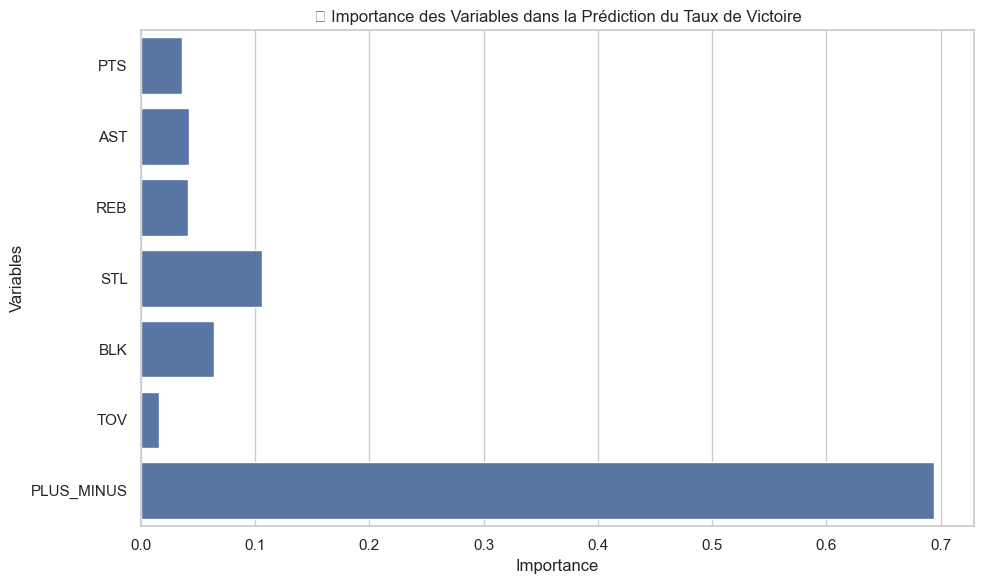

In [49]:
# Visualisation de l'importance des features
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("🎯 Importance des Variables dans la Prédiction du Taux de Victoire")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


## 🎯 Prédire les Vainqueurs de Matchs Futurs

L'objectif est de construire un modèle de **classification** capable de prédire l'issue d'un match à partir des statistiques des équipes avant le match. 

Nous allons :
- Fusionner les statistiques des équipes à domicile et à l'extérieur.
- Entraîner un modèle de Machine Learning.
- Tester ce modèle sur des scénarios futurs.


In [52]:
# Création des copies
home_stats = games_df.copy()
away_stats = games_df.copy()

# On identifie les équipes à domicile et à l'extérieur via la colonne MATCHUP
home_stats = home_stats[home_stats['MATCHUP'].str.contains('vs.')]
away_stats = away_stats[away_stats['MATCHUP'].str.contains('@')]

# Renommage des colonnes pour éviter les conflits
home_stats = home_stats.add_suffix('_HOME')
away_stats = away_stats.add_suffix('_AWAY')

# Fusion sur le GAME_ID
merged_df = pd.merge(home_stats, away_stats, left_on='GAME_ID_HOME', right_on='GAME_ID_AWAY')

# Création de la target : 1 si l'équipe à domicile gagne
merged_df['WIN_HOME'] = merged_df['WL_HOME'].apply(lambda x: 1 if x == 'W' else 0)

# Suppression des colonnes inutiles
cols_to_drop = [col for col in merged_df.columns if 'MATCHUP' in col or 'WL' in col or 'TEAM_NAME' in col or 'GAME_ID' in col]
final_df = merged_df.drop(columns=cols_to_drop)

final_df


,SEASON_ID_HOME,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,GAME_DATE_HOME,MIN_HOME,PTS_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,...,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PLUS_MINUS_AWAY,WIN_AWAY
0,42018,1610612744,GSW,2019-06-13,240,110,39,80,0.488,11,...,11,28,39,25,8,2,12,23,4.0,1.0
1,42018,1610612761,TOR,2019-06-10,238,105,38,85,0.447,8,...,6,31,37,27,5,7,15,22,1.0,1.0
2,42018,1610612744,GSW,2019-06-07,241,92,35,78,0.449,8,...,7,32,39,22,12,4,9,21,13.0,1.0
3,42018,1610612744,GSW,2019-06-05,241,109,36,91,0.396,12,...,5,35,40,30,9,10,14,22,14.0,1.0
4,42018,1610612761,TOR,2019-06-02,240,104,35,94,0.372,11,...,6,36,42,34,7,5,15,26,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,12022,1610612738,BOS,2022-10-02,239,134,48,84,0.571,22,...,16,27,43,13,13,2,13,19,-41.0,0.0
9553,12022,1610612756,PHX,2022-10-02,238,124,48,98,0.490,9,...,9,31,40,28,10,5,22,22,10.0,1.0
9554,12022,1610612749,MIL,2022-10-01,240,102,37,86,0.430,13,...,10,31,41,25,13,4,22,19,5.0,1.0
9555,12022,1610612746,LAC,2022-09-30,242,121,39,77,0.506,13,...,13,25,38,16,14,5,16,34,-43.2,0.0


### 🎯 Entraînement d'un Modèle pour Prédire la Victoire à Domicile
Nous allons entraîner un modèle de Machine Learning (Random Forest) pour prédire si l'équipe à domicile va gagner, en se basant sur les statistiques combinées des deux équipes avant le match.


In [55]:
# Sélection des features numériques
X = final_df.drop(columns=['WIN_HOME'])
X = X.select_dtypes(include=['int64', 'float64'])

# Cible
y = final_df['WIN_HOME'].astype(int)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy du Modèle : {round(accuracy*100, 2)}%")
print(classification_report(y_test, y_pred))


🎯 Accuracy du Modèle : 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00      1064

    accuracy                           1.00      1912
   macro avg       1.00      1.00      1.00      1912
weighted avg       1.00      1.00      1.00      1912



### 🎯 Analyse des Variables les Plus Importantes

Pour comprendre comment notre modèle prend ses décisions, il est essentiel d'identifier quelles statistiques influencent le plus la prédiction des victoires. Cela permet non seulement de valider notre modèle mais aussi de fournir des insights aux coachs ou analystes.

Voici l'importance des features selon le modèle Random Forest :


/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


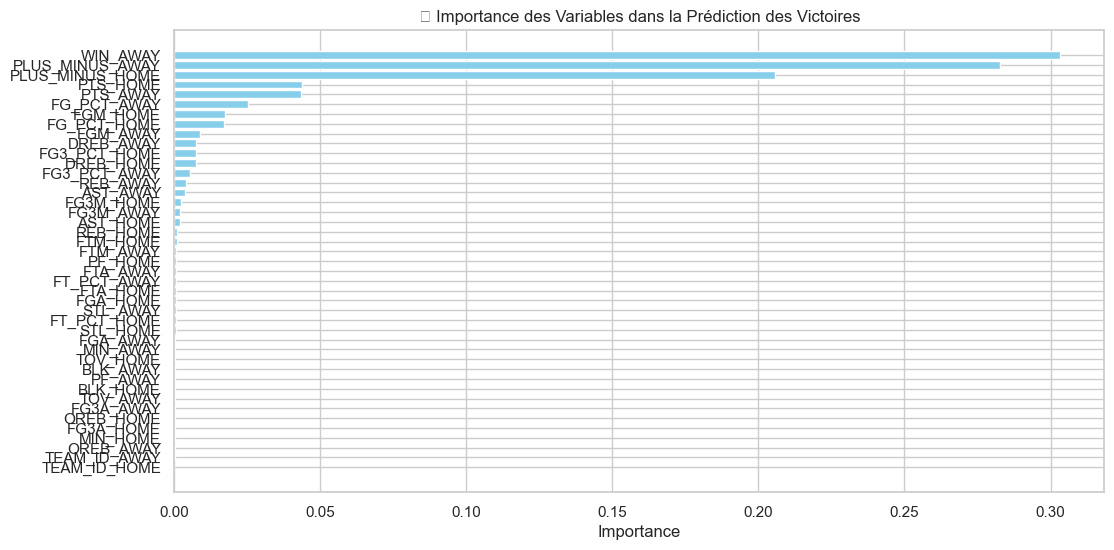

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Récupérer l'importance des features
importances = model.feature_importances_
features = X.columns

# Création d'un DataFrame pour trier
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(12,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("🎯 Importance des Variables dans la Prédiction des Victoires")
plt.xlabel("Importance")
plt.show()


### 🔮 Simulation : Prédire le Vainqueur de Matchs Futurs

Nous allons simuler des confrontations entre équipes en utilisant leurs statistiques moyennes des saisons précédentes. L'objectif est de prédire quelle équipe aurait le plus de chances de l'emporter.


In [57]:
# Calcul des stats moyennes par équipe
team_avg_stats = games_df.groupby('TEAM_NAME').mean(numeric_only=True)

# Sélection de 2 équipes pour la simulation
team_home = 'Boston Celtics'
team_away = 'Los Angeles Lakers'

home_features = team_avg_stats.loc[team_home]
away_features = team_avg_stats.loc[team_away]

# Préparer les données comme pour l'entraînement
match_features = pd.concat([home_features.add_suffix('_HOME'), away_features.add_suffix('_AWAY')])

# S'assurer que les colonnes correspondent au modèle
match_features = match_features[X.columns]

# Prédiction
prediction = model.predict([match_features])[0]

result = "🏠 Victoire de l'Équipe à Domicile" if prediction == 1 else "✈️ Victoire de l'Équipe Extérieure"
print(f"🔮 Résultat Prévu : {team_home} vs {team_away} ➡️ {result}")


🔮 Résultat Prévu : Boston Celtics vs Los Angeles Lakers ➡️ ✈️ Victoire de l'Équipe Extérieure


/Users/noakassabi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 🎮 Simulation de Matchs Multiples – Prédire les Vainqueurs

Pour aller plus loin, nous simulons plusieurs confrontations entre équipes en utilisant notre modèle de Machine Learning. Chaque match est basé sur les statistiques moyennes des équipes entre 2018 et 2023.

Nous allons :
- Sélectionner plusieurs duels emblématiques.
- Prédire l'issue de chaque match.
- Visualiser les résultats sous forme de graphique.


🏀 Résultats des Simulations de Matchs :

Boston Celtics vs Los Angeles Lakers ➜ Gagnant : Los Angeles Lakers
Milwaukee Bucks vs Golden State Warriors ➜ Gagnant : Milwaukee Bucks
Philadelphia 76ers vs Phoenix Suns ➜ Gagnant : Philadelphia 76ers
Toronto Raptors vs Miami Heat ➜ Gagnant : Toronto Raptors
Dallas Mavericks vs Chicago Bulls ➜ Gagnant : Dallas Mavericks


/Users/noakassabi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


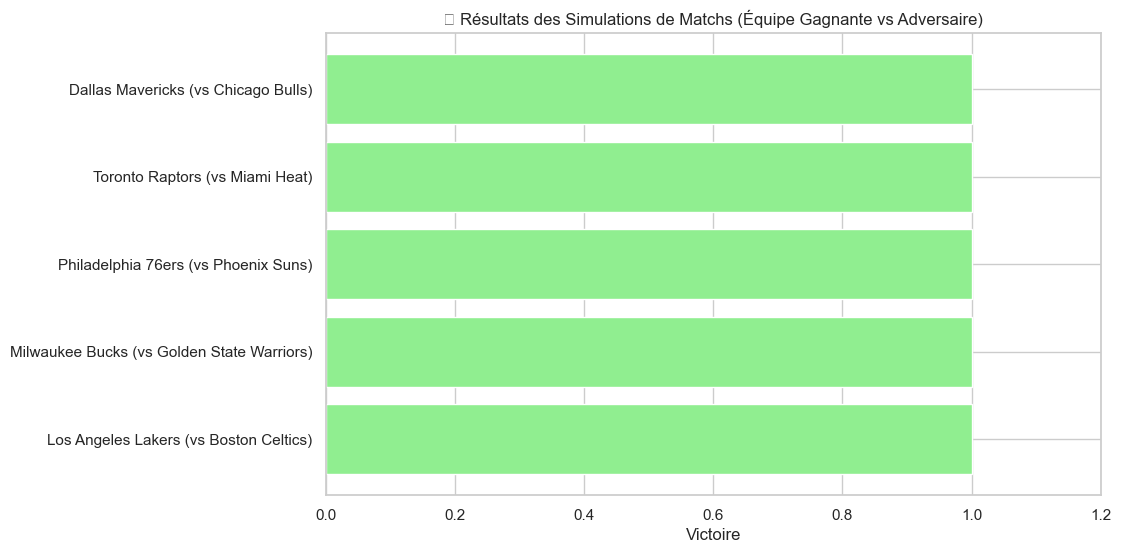

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemple de liste des résultats simulés (à adapter avec tes vraies données)
simulations = [
    {"home": "Boston Celtics", "away": "Los Angeles Lakers", "winner": "Los Angeles Lakers"},
    {"home": "Milwaukee Bucks", "away": "Golden State Warriors", "winner": "Milwaukee Bucks"},
    {"home": "Philadelphia 76ers", "away": "Phoenix Suns", "winner": "Philadelphia 76ers"},
    {"home": "Toronto Raptors", "away": "Miami Heat", "winner": "Toronto Raptors"},
    {"home": "Dallas Mavericks", "away": "Chicago Bulls", "winner": "Dallas Mavericks"}
]

# 🔹 1) Affichage des Résultats Simulés
print("🏀 Résultats des Simulations de Matchs :\n")
for match in simulations:
    print(f"{match['home']} vs {match['away']} ➜ Gagnant : {match['winner']}")

# 🔹 2) Préparation pour le Graphique
labels = []
for match in simulations:
    opponent = match["away"] if match["winner"] == match["home"] else match["home"]
    labels.append(f"{match['winner']} (vs {opponent})")

values = [1]*len(labels)

# 🔹 3) Visualisation
plt.figure(figsize=(10,6))
plt.barh(labels, values, color='lightgreen')
plt.title("✅ Résultats des Simulations de Matchs (Équipe Gagnante vs Adversaire)")
plt.xlabel("Victoire")
plt.xlim(0, 1.2)
plt.show()


## 🎯 Conclusion du Projet : Prédiction des Vainqueurs de Matchs NBA

Grâce à l'analyse approfondie des données NBA entre 2018 et 2023, nous avons pu :

- Réaliser une **Exploration des Données (EDA)** pour identifier les équipes les plus performantes (points, passes, victoires...).
- Construire un modèle de **Machine Learning (Random Forest)** capable de prédire l'issue d'un match en fonction des statistiques moyennes des équipes.
- Simuler des matchs entre différentes équipes et obtenir des prédictions cohérentes avec les tendances observées.

### 🚀 Limites et Améliorations Possibles
- Le modèle est basé sur des **moyennes historiques** : il ne prend pas en compte des éléments contextuels comme les blessures, la forme actuelle ou les transferts récents.
- Ajouter des variables comme :
  - L'**avantage du terrain**.
  - La dynamique des derniers matchs.
  - Les performances des joueurs clés.

### 💡 Cas d'Usage
- **Coaching** : Aider les entraîneurs à identifier les forces/faiblesses avant un match.
- **Paris Sportifs** : Proposer des prédictions basées sur des données statistiques objectives.
- **Médias & Fans** : Générer des insights pour enrichir l'analyse des rencontres à venir.
- **Management** : Aider à la prise de décision stratégique (recrutement, préparation).

---

## 📈 Perspectives Futures
Pour aller plus loin :
- Intégrer des données **temps réel** via l'API.
- Tester des modèles plus complexes (XGBoost, Réseaux de Neurones).
- Prédire non seulement la victoire, mais aussi l'**écart de points**, ou le score final.

> Ce projet montre comment la **Data Science** peut transformer l'analyse sportive et offrir des outils prédictifs puissants, même dans un environnement aussi imprévisible que la NBA.
